In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import random, os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [106]:
!%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

/bin/bash: line 1: fg: no job control


In [107]:
def set_seed(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    tf.config.threading.set_intra_op_parallelism_threads(1)
    tf.config.threading.set_inter_op_parallelism_threads(1)

set_seed(42)

In [108]:
df = pd.read_csv('/content/drive/MyDrive/LIKELION_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®/datathon/final.csv')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     300 non-null    int64  
 1   TIME           300 non-null    object 
 2   Ïõê/Îã¨Îü¨ÌôòÏú®         300 non-null    float64
 3   ÌïúÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    291 non-null    float64
 4   ÎØ∏Íµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 5   Ï§ëÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    132 non-null    float64
 6   ÌïúÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 7   ÎØ∏Íµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64
 8   Ï§ëÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64
 9   Ï†ÑÏ≤¥ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 10  ÎØ∏Íµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 11  Ï§ëÍµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 12  Ï†ÑÏ≤¥ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 13  ÎØ∏Íµ≠ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 14  Ï§ëÍµ≠ ÏàòÏûÖ Ï¥ùÏï°

# CNN
create_sequences()Î•º ÌÜµÌï¥ÏÑú ÌÉÄÍ≤üÍ∞íÏùÄ Ïõê/Îã¨Îü¨ÌôòÏú®Î°ú ÎÑ£ÏóàÏßÄÎßå, `X[i:i+12] ‚Üí y[i+12]` ÏúºÎ°ú 12Í∞úÏõîÏùò Ïù¥Î†•ÏúºÎ°ú 1Í∞úÏõî ÌõÑ ÏóêÏ∏°Ïù¥ÎùºÎäî Íµ¨Ï°∞ ÏÉùÏÑ±

| Ïã§ÌóòÏΩîÎìú | Î≥ÄÏàò ÏßëÌï©   | Î≥ÄÏàò ÏÑ†ÌÉù Î∞©Ïãù                                        | ÌÉÄÍπÉ           |
| ---- | ------- | ----------------------------------------------- | ------------ |
| A-1  | 31Í∞ú Ï†ÑÏ≤¥  | Ï†Ñ Î≥ÄÏàò ÏÇ¨Ïö©                                         | Ïõê/Îã¨Îü¨ÌôòÏú® |
| A-2  | 31Í∞ú Ï†ÑÏ≤¥  | L1 Ï†ïÍ∑úÌôî Í∏∞Î∞ò ÏÑ†ÌÉù (Lasso)                            | Ïõê/Îã¨Îü¨ÌôòÏú® |
| A-3  | 31Í∞ú Ï†ÑÏ≤¥  | Feature Importance Í∏∞Î∞ò ÏÑ†ÌÉù (RandomForest) | Ïõê/Îã¨Îü¨ÌôòÏú® |
| A-4  | 31Í∞ú Ï†ÑÏ≤¥  | Permutation Importance Í∏∞Î∞ò ÏÑ†ÌÉù | Ïõê/Îã¨Îü¨ÌôòÏú® |
| B-1  | Ïú†Ìö®Ìïú 20Í∞ú | Ï†Ñ Î≥ÄÏàò ÏÇ¨Ïö©                                         | Ïõê/Îã¨Îü¨ÌôòÏú® |
| B-2  | Ïú†Ìö®Ìïú 20Í∞ú | L1 Ï†ïÍ∑úÌôî Í∏∞Î∞ò ÏÑ†ÌÉù (Lasso)                            | Ïõê/Îã¨Îü¨ÌôòÏú® |
| B-3  | Ïú†Ìö®Ìïú 20Í∞ú | Feature Importance Í∏∞Î∞ò ÏÑ†ÌÉù (RandomForest) | Ïõê/Îã¨Îü¨ÌôòÏú® |
| B-4  | Ïú†Ìö®Ìïú 20Í∞ú  | Permutation Importance Í∏∞Î∞ò ÏÑ†ÌÉù | Ïõê/Îã¨Îü¨ÌôòÏú® |



## A-1

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 0. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 1. Î≥ÄÏàò Ï†ïÏùò
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']

# 2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞è ÌÉÄÍπÉ ÏÑ§Ï†ï
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear')
df_filled = df_filled.ffill().bfill()

X = df_filled[features].values
y = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# 3. Ï†ïÍ∑úÌôî Î∞è ÏãúÌÄÄÏä§ ÏÉùÏÑ±
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_seq, y_seq = create_sequences(X_scaled, y, time_steps=12)

# 4. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† (8:2)
split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# 5. CNN Î™®Îç∏ Íµ¨ÏÑ±
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Ï∂úÎ†•
print("üîπ A-1 Ïã§Ìóò Í≤∞Í≥º (CNN, create_sequences Î∞©Ïãù):")
print("RMSE:", rmse)
print("MAE:", mae)
print("R¬≤ score:", r2)


<ipython-input-110-97688da46ff8>:27: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 115ms/step
üîπ A-1 Ïã§Ìóò Í≤∞Í≥º (CNN, create_sequences Î∞©Ïãù):
RMSE: 87.45795708616245
MAE: 75.76666478650324
R¬≤ score: 0.12151523892838123


## A-2

In [111]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 1. Î≥ÄÏàò Ï†ïÏùò
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']

# 2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear')
df_filled = df_filled.ffill().bfill()
df_filled = df_filled.dropna()

X_raw = df_filled[features].copy()
y_raw = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# 3. Ï†ïÍ∑úÌôî ÌõÑ LassoCV Ï†ÅÏö©
scaler = MinMaxScaler()
X_scaled_raw = scaler.fit_transform(X_raw)

lasso = LassoCV(alphas=[0.001, 0.01, 0.1], cv=5).fit(X_scaled_raw, y_raw)
coef = pd.Series(lasso.coef_, index=X_raw.columns)
selected_features = coef[coef != 0].index.tolist()

print("üìå L1 Ï†ïÍ∑úÌôîÎ°ú ÏÑ†ÌÉùÎêú Î≥ÄÏàò:", selected_features)

# 4. ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎ°ú Ï†ïÍ∑úÌôî Îã§Ïãú ÏàòÌñâ
X = df_filled[selected_features].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. ÏãúÌÄÄÏä§ Íµ¨ÏÑ±
X_seq, y_seq = create_sequences(X_scaled, y_raw, time_steps=12)

# 6. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# 7. CNN Î™®Îç∏ Íµ¨ÏÑ±
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# 8. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 9. Ï∂úÎ†•
print("üîπ A-2 Ïã§Ìóò Í≤∞Í≥º (L1 Í∏∞Î∞ò Î≥ÄÏàò ÏÑ†ÌÉù):")
print("ÏÑ†ÌÉùÎêú Î≥ÄÏàò:", selected_features)
print("RMSE:", rmse)
print("MAE:", mae)
print("R¬≤ score:", r2)


üìå L1 Ï†ïÍ∑úÌôîÎ°ú ÏÑ†ÌÉùÎêú Î≥ÄÏàò: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°', 'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']


<ipython-input-111-97765e0c43d5>:27: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.67497331582126, tolerance: 337.9042732899583

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 21954.110467416423, tolerance: 337.9042732899583

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 27142.49929672433, tolerance: 181.4295669133333

/usr/local/lib/python3.11/dist

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
üîπ A-2 Ïã§Ìóò Í≤∞Í≥º (L1 Í∏∞Î∞ò Î≥ÄÏàò ÏÑ†ÌÉù):
ÏÑ†ÌÉùÎêú Î≥ÄÏàò: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°', 'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']
RMSE: 85.67981314186514
MAE: 73.4991296807651
R¬≤ score: 0.15687377780961764


## A-3

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 1. Ï†ÑÏ≤¥ Î≥ÄÏàò Ï†ïÏùò
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear').ffill().bfill().dropna()

X_raw = df_filled[features].copy()
y_raw = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# 3. Feature Importance Í≥ÑÏÇ∞
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_raw, y_raw)
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# 4. Ïã§Ìóò Î∞òÎ≥µ: ÏÉÅÏúÑ 2~10Í∞ú Î≥ÄÏàò
results = []

for top_n in range(2, 11):
    selected_features = importances.head(top_n).index.tolist()
    X = df_filled[selected_features].values
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    X_seq, y_seq = create_sequences(X_scaled, y_raw, time_steps=12)
    split_idx = int(len(X_seq) * 0.8)
    X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
    y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((top_n, rmse, mae, r2))

# 5. Í≤∞Í≥º Ï†ïÎ¶¨ Ï∂úÎ†•
print("\nüìä CNN ÏÑ±Îä• (ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò Í∞úÏàòÎ≥Ñ)")
print("| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |")
print("|---------|----------|----------|---------|")
for r in results:
    print(f"|   {r[0]:<5} | {r[1]:<8.2f} | {r[2]:<8.2f} | {r[3]:<7.3f} |")


<ipython-input-112-6c89b221121a>:25: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 123ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 85ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step

üìä CNN ÏÑ±Îä• (ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò Í∞úÏàòÎ≥Ñ)
| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |
|---------|----------|----------|---------|
|   2     | 551.18   | 543.09   | -33.892 |
|   3     | 428.12   | 390.84   | -20.051 |
|   4     | 424.26   | 385.57   | -19.673 |
|   5     | 419.33   | 379.26   | -19.195 |
|   6     | 219.88   | 180.43   | -4.553  |
|   7     | 220.05   | 178.70   | -4.561  |
|   8     | 241.08   | 188.75   | -5.675  |
|   9     | 239.93   | 212.74   | -5.611  |
|   10    | 245.03   | 211.55   | -5.896  |


## A-4

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import copy

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Ï†ÑÏ≤¥ Î≥ÄÏàò Ï†ïÏùò (31Í∞ú)
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÎØ∏Íµ≠ Í∏∞Ï§Ä Í∏àÎ¶¨', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°',
            'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'WTI Ïú†Í∞Ä', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©',
            'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Í∏à Í∞ÄÍ≤©', 'ÎåÄÎëê Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°',
            'Ïò•ÏàòÏàò Í∞ÄÍ≤©', 'ÏÜåÎß• Í∞ÄÍ≤©', 'ÏõêÎãπ Í∞ÄÍ≤©', 'ÏõêÎ©¥ Í∞ÄÍ≤©',
            'ÌïúÍµ≠ Í≤ΩÏÉÅÏàòÏßÄ', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®',
            'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'vix']

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear').ffill().bfill().dropna()
X_raw = df_filled[features].values
y_raw = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# Ï†ïÍ∑úÌôî Î∞è ÏãúÌÄÄÏä§ ÏÉùÏÑ±
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)
X_seq, y_seq = create_sequences(X_scaled, y_raw, time_steps=12)

split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# A-1 CNN ÌïôÏäµ (Ï†ÑÏ≤¥ Î≥ÄÏàòÎ°ú baseline Î™®Îç∏)
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# ÏòàÏ∏° Î∞è ÏÑ±Îä• Í∏∞Î°ù
y_pred_baseline = model.predict(X_test)
base_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# Permutation Importance Í≥ÑÏÇ∞
importances = []
for i in range(X_test.shape[2]):
    X_test_perm = X_test.copy()
    np.random.shuffle(X_test_perm[:, :, i])
    y_pred_perm = model.predict(X_test_perm)
    perm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_perm))
    delta_rmse = perm_rmse - base_rmse
    importances.append((features[i], delta_rmse))

# Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨
importances.sort(key=lambda x: x[1], reverse=True)
print("üìå Permutation Importance (RMSE Ï¶ùÍ∞ÄÎüâ Í∏∞Ï§Ä):")
for feat, imp in importances:
    print(f"{feat}: {imp:.4f}")

# ÏÉÅÏúÑ Î≥ÄÏàò Ï°∞Ìï© ÏÑ§Ï†ï
top_sets = [3, 5, 10, 15]
results = []

for top_n in top_sets:
    top_features = [f[0] for f in importances[:top_n]]
    selected_indices = [features.index(f) for f in top_features]

    X_selected = df_filled[top_features].values
    X_scaled_sub = MinMaxScaler().fit_transform(X_selected)
    X_seq_sub, y_seq_sub = create_sequences(X_scaled_sub, y_raw, time_steps=12)

    split_idx = int(len(X_seq_sub) * 0.8)
    X_train_sub, X_test_sub = X_seq_sub[:split_idx], X_seq_sub[split_idx:]
    y_train_sub, y_test_sub = y_seq_sub[:split_idx], y_seq_sub[split_idx:]

    # CNN Ïû¨ÌïôÏäµ
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_sub.shape[1], X_train_sub.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_sub, y_train_sub, epochs=50, batch_size=16, verbose=0)

    y_pred = model.predict(X_test_sub)
    rmse = np.sqrt(mean_squared_error(y_test_sub, y_pred))
    mae = mean_absolute_error(y_test_sub, y_pred)
    r2 = r2_score(y_test_sub, y_pred)

    results.append((top_n, rmse, mae, r2, top_features))

# Í≤∞Í≥º Ï∂úÎ†•
print("\nüìä A-4 Ïã§Ìóò Í≤∞Í≥º (Permutation Í∏∞Î∞ò ÏÉÅÏúÑ Î≥ÄÏàò Ïàò)")
print("| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |")
print("|---------|----------|----------|---------|")
for r in results:
    print(f"|   {r[0]:<5} | {r[1]:<8.2f} | {r[2]:<8.2f} | {r[3]:<7.3f} |")


<ipython-input-113-864d8e7c6d53>:28: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 210ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step

üìä A-4 Ïã§Ìóò Í≤∞Í≥º (Permutation Í∏∞Î∞ò ÏÉÅÏúÑ Î≥ÄÏàò Ïàò)
| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |
|---------|----------|----------|---------|
|   3     | 354.96   | 340.59   | -13.471 |
|   5     | 249.03   | 217.88   | -6.123  |
|   10    | 224.29   | 189.45   | -4.778  |
|   15    | 96.76    | 85.25    | -0.075  |


### A(31Í∞ú Î≥ÄÏàò ÏÇ¨Ïö©) Í≤∞Í≥º Ï†ïÎ¶¨
| Ïã§ÌóòÏΩîÎìú | Î≥ÄÏàò ÏÑ†ÌÉù Î∞©Ïãù                  | Î≥ÄÏàò Ïàò    | RMSE      | MAE       | R¬≤ score   |
| ---- | ------------------------- | ------- | --------- | --------- | ---------- |
| A-1  | Ï†ÑÏ≤¥ Î≥ÄÏàò ÏÇ¨Ïö©                  | 31      | 87.46     | 75.77     | 0.122      |
| A-2  | L1 Ï†ïÍ∑úÌôî (Œ± ÏÑ†ÌÉùÌòï)            | 31 (ÎèôÏùº) | 85.68     | 73.50     | 0.157      |
| A-3  | RF Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÏÉÅÏúÑ 7Í∞ú           | 7       | 211.58    | 171.63    | -4.14      |
| A-4  | Permutation Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÏÉÅÏúÑ 15Í∞ú | 15      | 95.76 | 83.72 | -0.053 |



---

## B-1

In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 1. Ïú†Ìö® Î≥ÄÏàò Ï†ïÏùò (20Í∞ú)
features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
    'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†','M2',
    'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
    'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°'
]

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear').ffill().bfill().dropna()

X = df_filled[features].values
y = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# 3. Ï†ïÍ∑úÌôî Î∞è ÏãúÌÄÄÏä§ Íµ¨ÏÑ±
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_seq, y_seq = create_sequences(X_scaled, y, time_steps=12)

# 4. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† (8:2)
split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# 5. CNN Î™®Îç∏ Íµ¨ÏÑ±
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# 6. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 7. Í≤∞Í≥º Ï∂úÎ†•
print("üîπ B-1 Ïã§Ìóò Í≤∞Í≥º (20Í∞ú Ïú†Ìö® Î≥ÄÏàò):")
print("RMSE:", rmse)
print("MAE:", mae)
print("R¬≤ score:", r2)


<ipython-input-114-dd50e5e2d791>:27: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 53ms/step
üîπ B-1 Ïã§Ìóò Í≤∞Í≥º (20Í∞ú Ïú†Ìö® Î≥ÄÏàò):
RMSE: 118.72160622524676
MAE: 105.01288119612069
R¬≤ score: -0.6188071077687285


## B-2

In [115]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
import numpy as np

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 1. Î≥ÄÏàò Ï†ïÏùò (20Í∞ú Ïú†Ìö® Î≥ÄÏàò)
features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
    'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†','M2',
    'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
    'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°'
]

# 2. Ï†ÑÏ≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear').ffill().bfill().dropna()

X_raw = df_filled[features].copy()
y_raw = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# 3. Ï†ïÍ∑úÌôî (Í≥µÌÜµ)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

alphas = [0.001, 0.01, 0.1]
results = []

for alpha in alphas:
    # 4. Lasso(alpha)Î°ú Î≥ÄÏàò ÏÑ†ÌÉù
    lasso = Lasso(alpha=alpha).fit(X_scaled, y_raw)
    coef = pd.Series(lasso.coef_, index=X_raw.columns)
    selected_features = coef[coef != 0].index.tolist()

    print(f"\nüìå alpha={alpha} ‚Üí ÏÑ†ÌÉùÎêú Î≥ÄÏàò: {selected_features}")

    if len(selected_features) == 0:
        print("‚ùå ÏÑ†ÌÉùÎêú Î≥ÄÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§. ÏÑ±Îä• ÌèâÍ∞Ä ÏÉùÎûµ.")
        results.append((alpha, 0, 0, -np.inf, []))
        continue

    # 5. ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ±
    X = df_filled[selected_features].values
    X_scaled_sub = MinMaxScaler().fit_transform(X)
    X_seq, y_seq = create_sequences(X_scaled_sub, y_raw, time_steps=12)

    split_idx = int(len(X_seq) * 0.8)
    X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
    y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

    # 6. CNN Î™®Îç∏ Íµ¨ÏÑ±
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((alpha, rmse, mae, r2, selected_features))

# 7. Í≤∞Í≥º Ï∂úÎ†•
print("\nüìä B-2 Ïã§Ìóò Í≤∞Í≥º (alpha Í∞íÎ≥Ñ)")
print("| alpha | #Î≥ÄÏàò |   RMSE   |   MAE    |   R¬≤    |")
print("|--------|--------|----------|----------|---------|")
for r in results:
    print(f"| {r[0]:<6} | {len(r[4]):<6} | {r[1]:<8.2f} | {r[2]:<8.2f} | {r[3]:<7.3f} |")



üìå alpha=0.001 ‚Üí ÏÑ†ÌÉùÎêú Î≥ÄÏàò: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']


<ipython-input-115-309e661c4908>:28: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+05, tolerance: 3.854e+02

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step

üìå alpha=0.01 ‚Üí ÏÑ†ÌÉùÎêú Î≥ÄÏàò: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.946e+04, tolerance: 3.854e+02

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step

üìå alpha=0.1 ‚Üí ÏÑ†ÌÉùÎêú Î≥ÄÏàò: ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 75ms/step

üìä B-2 Ïã§Ìóò Í≤∞Í≥º (alpha Í∞íÎ≥Ñ)
| alpha | #Î≥ÄÏàò |   RMSE   |   MAE    |   R¬≤    |
|--------|--------|----------|----------|---------|
| 0.001  | 20     | 118.54   | 105.57   | -0.614  |
| 0.01   | 20     | 119.16   | 106.13   | -0.631  |
| 0.1    | 17     | 144.66   | 122.63   | -1.403  |


## B-3

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
import numpy as np

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 1. Ïú†Ìö® Î≥ÄÏàò Ï†ïÏùò (20Í∞ú)
features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
    'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†','M2',
    'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
    'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°'
]

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear').ffill().bfill().dropna()
X_raw = df_filled[features].copy()
y_raw = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# 3. RF Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_raw, y_raw)
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# 4. Ïã§Ìóò Î£®ÌîÑ: ÏÉÅÏúÑ 10~2Í∞ú Î≥ÄÏàò
results = []

for top_n in range(10, 1, -1):
    selected_features = importances.head(top_n).index.tolist()
    X = df_filled[selected_features].values
    X_scaled = MinMaxScaler().fit_transform(X)
    X_seq, y_seq = create_sequences(X_scaled, y_raw, time_steps=12)

    split_idx = int(len(X_seq) * 0.8)
    X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
    y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

    # CNN Î™®Îç∏ Íµ¨ÏÑ±
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((top_n, rmse, mae, r2))

# 5. Í≤∞Í≥º Ï∂úÎ†•
print("\nüìä B-3 Ïã§Ìóò Í≤∞Í≥º (ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò Í∞úÏàòÎ≥Ñ)")
print("| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |")
print("|---------|----------|----------|---------|")
for r in results:
    print(f"|   {r[0]:<5} | {r[1]:<8.2f} | {r[2]:<8.2f} | {r[3]:<7.3f} |")


<ipython-input-116-cad18253aff1>:28: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step

üìä B-3 Ïã§Ìóò Í≤∞Í≥º (ÏÉÅÏúÑ Ï§ëÏöî Î≥ÄÏàò Í∞úÏàòÎ≥Ñ)
| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |
|---------|----------|----------|---------|
|   10    | 175.84   | 156.90   | -2.551  |
|   9     | 176.61   | 150.53   | -2.582  |
|   8     | 226.19   | 179.36   | -4.876  |
|   7     | 189.93   | 153.20   | -3.143  |
|   6     | 190.70   | 153.37   | -3.177  |
|   5     | 175.94   | 140.65   | -2.555  |
|   4     | 440.38   | 401.07   | -21.273 |
|   3     | 383.58   | 345.15   | -15.899 |
|   2     | 478.10   | 471.02   | -25.253 |


## B-4

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import copy

# ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Ï†ÑÏ≤¥ Î≥ÄÏàò Ï†ïÏùò (20Í∞ú)
features = [
    'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
    'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†','M2',
    'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
    'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°'
]

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_filled = df.copy()
df_filled = df_filled.interpolate(method='linear').ffill().bfill().dropna()
X_raw = df_filled[features].values
y_raw = df_filled["Ïõê/Îã¨Îü¨ÌôòÏú®"].values

# Ï†ïÍ∑úÌôî Î∞è ÏãúÌÄÄÏä§ ÏÉùÏÑ±
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)
X_seq, y_seq = create_sequences(X_scaled, y_raw, time_steps=12)

split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# A-1 CNN ÌïôÏäµ (Ï†ÑÏ≤¥ Î≥ÄÏàòÎ°ú baseline Î™®Îç∏)
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# ÏòàÏ∏° Î∞è ÏÑ±Îä• Í∏∞Î°ù
y_pred_baseline = model.predict(X_test)
base_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# Permutation Importance Í≥ÑÏÇ∞
importances = []
for i in range(X_test.shape[2]):
    X_test_perm = X_test.copy()
    np.random.shuffle(X_test_perm[:, :, i])
    y_pred_perm = model.predict(X_test_perm)
    perm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_perm))
    delta_rmse = perm_rmse - base_rmse
    importances.append((features[i], delta_rmse))

# Ï§ëÏöîÎèÑ Ïàú Ï†ïÎ†¨
importances.sort(key=lambda x: x[1], reverse=True)
print("üìå Permutation Importance (RMSE Ï¶ùÍ∞ÄÎüâ Í∏∞Ï§Ä):")
for feat, imp in importances:
    print(f"{feat}: {imp:.4f}")

# ÏÉÅÏúÑ Î≥ÄÏàò Ï°∞Ìï© ÏÑ§Ï†ï
top_sets = [3, 5, 10, 15]
results = []

for top_n in top_sets:
    top_features = [f[0] for f in importances[:top_n]]
    selected_indices = [features.index(f) for f in top_features]

    X_selected = df_filled[top_features].values
    X_scaled_sub = MinMaxScaler().fit_transform(X_selected)
    X_seq_sub, y_seq_sub = create_sequences(X_scaled_sub, y_raw, time_steps=12)

    split_idx = int(len(X_seq_sub) * 0.8)
    X_train_sub, X_test_sub = X_seq_sub[:split_idx], X_seq_sub[split_idx:]
    y_train_sub, y_test_sub = y_seq_sub[:split_idx], y_seq_sub[split_idx:]

    # CNN Ïû¨ÌïôÏäµ
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_sub.shape[1], X_train_sub.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_sub, y_train_sub, epochs=50, batch_size=16, verbose=0)

    y_pred = model.predict(X_test_sub)
    rmse = np.sqrt(mean_squared_error(y_test_sub, y_pred))
    mae = mean_absolute_error(y_test_sub, y_pred)
    r2 = r2_score(y_test_sub, y_pred)

    results.append((top_n, rmse, mae, r2, top_features))

# Í≤∞Í≥º Ï∂úÎ†•
print("\nüìä B-4 Ïã§Ìóò Í≤∞Í≥º (Permutation Í∏∞Î∞ò ÏÉÅÏúÑ Î≥ÄÏàò Ïàò)")
print("| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |")
print("|---------|----------|----------|---------|")
for r in results:
    print(f"|   {r[0]:<5} | {r[1]:<8.2f} | {r[2]:<8.2f} | {r[3]:<7.3f} |")


<ipython-input-117-279533a8f5c1>:28: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step

üìä B-4 Ïã§Ìóò Í≤∞Í≥º (Permutation Í∏∞Î∞ò ÏÉÅÏúÑ Î≥ÄÏàò Ïàò)
| Î≥ÄÏàò Ïàò |   RMSE   |   MAE    |   R¬≤    |
|---------|----------|----------|---------|
|   3     | 336.41   | 326.39   | -11.998 |
|   5     | 140.49   | 124.47   | -1.267  |
|   10    | 101.57   | 85.44    | -0.185  |
|   15    | 103.71   | 87.98    | -0.235  |


### B(Ïú†Ìö®Î≥ÄÏàò 20Í∞ú) Ïã§Ìóò Í≤∞Í≥º Ï†ïÎ¶¨

| Ïã§ÌóòÏΩîÎìú | Î≥ÄÏàò ÏÑ†ÌÉù Î∞©Ïãù                  | Î≥ÄÏàò Ïàò | RMSE      | MAE       | R¬≤ score   |
| ---- | ------------------------- | ---- | --------- | --------- | ---------- |
| B-1  | Ï†ÑÏ≤¥ Î≥ÄÏàò ÏÇ¨Ïö©                  | 20   | 116.80    | 105.11    | -0.567     |
| B-2  | L1 Ï†ïÍ∑úÌôî (Œ± = 0.01)         | 20   | 118.72    | 105.01    | -0.619     |
| B-3  | RF Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÏÉÅÏúÑ 9Í∞ú           | 9    | 179.82    | 154.10    | -2.714     |
| B-4  | Permutation Ï§ëÏöîÎèÑ Í∏∞Î∞ò ÏÉÅÏúÑ 10Í∞ú | 10   | 94.10 | 77.42 | -0.017 |


# ÏµúÍ≥† ÏòàÏ∏° Î™®Îç∏ -  LSTM

In [118]:
import pandas as pd
import requests
from io import StringIO
from time import sleep
import json
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import seaborn as sns
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip install tensorflow pandas numpy scikit-learn matplotlib
!%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

/bin/bash: line 1: fg: no job control


In [119]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from pandas.tseries.offsets import MonthEnd
import copy

# === ÏãúÎìú Í≥†Ï†ï ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

X = df[features].ffill().bfill()
y = df[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# === baseline Î™®Îç∏ ===
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
          callbacks=[early_stop], verbose=0)

y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_seq)
baseline_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# === Permutation Importance ===
importance_results = {}
for col_idx in range(X_test_scaled.shape[1]):
    X_test_perm = copy.deepcopy(X_test_seq)
    for i in range(X_test_perm.shape[0]):
        np.random.shuffle(X_test_perm[:, :, col_idx])

    y_pred_perm_scaled = model.predict(X_test_perm)
    y_pred_perm = scaler_y.inverse_transform(y_pred_perm_scaled)
    perm_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_perm))
    importance = perm_rmse - baseline_rmse
    importance_results[col_idx] = importance

# Ï§ëÏöîÎèÑ ÏàúÏúÑ
sorted_importance = sorted(importance_results.items(), key=lambda x: x[1], reverse=True)
sorted_indices = [idx for idx, _ in sorted_importance]
sorted_features = [features[idx] for idx in sorted_indices]

print("\n‚úÖ Feature Importance Ranking (Top to Bottom):")
for feat, idx in zip(sorted_features, sorted_indices):
    print(f"- {feat}: Importance = {importance_results[idx]:.4f}")

# === Ïã§Ìóò: ÏÉÅÏúÑ 3, 5, 10, 15Í∞ú ÎπÑÍµê ===
results = []

for top_n in [3, 5, 10, 15]:
    selected_indices = sorted_indices[:top_n]
    selected_feats = [features[i] for i in selected_indices]

    X_train_top = X_train_scaled[:, selected_indices]
    X_test_top = X_test_scaled[:, selected_indices]

    X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
    X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

    model_top = Sequential()
    model_top.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
    model_top.add(LSTM(32, activation='relu'))
    model_top.add(Dense(1))
    model_top.compile(optimizer='adam', loss='mse')

    model_top.fit(X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
                  validation_data=(X_test_seq_top, y_test_seq_top),
                  callbacks=[early_stop], verbose=0)

    y_pred_top_scaled = model_top.predict(X_test_seq_top)
    y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
    y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

    rmse = np.sqrt(mean_squared_error(y_test_actual_top, y_pred_top))
    mae = mean_absolute_error(y_test_actual_top, y_pred_top)
    r2 = r2_score(y_test_actual_top, y_pred_top)

    results.append({
        'Top_N_Features': top_n,
        'Selected_Features': selected_feats,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# === Í≤∞Í≥º Ï∂úÎ†• ===
print("\n‚úÖ Final Results Comparison:")
for res in results:
    print(f"\n‚ñ∂ Top {res['Top_N_Features']} Features")
    print(f"Selected: {res['Selected_Features']}")
    print(f"RMSE: {res['RMSE']:.4f}")
    print(f"MAE: {res['MAE']:.4f}")
    print(f"R¬≤: {res['R2']:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 455ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 237ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 217ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 211ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 243ms/step

‚úÖ Final Results Comparison:

‚ñ∂ Top 3 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2']
RMSE: 80.7150
MAE: 63.4822
R¬≤: 0.2318

‚ñ∂ Top 5 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®']
RMSE: 72.5241
MAE: 60.2008
R¬≤: 0.3798

‚ñ∂ Top 10 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'WTI Ïú†Í∞Ä', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò']
RMSE: 46.1025
MAE: 37.8076
R¬≤: 0.7494

‚ñ∂ Top 15 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'WTI Ïú†Í∞Ä', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©']
RMSE: 68.87

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 236ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 204ms/step

‚úÖ Final model Performance (Top 10 Features)
RMSE: 44.8524
MAE: 36.9839
R¬≤: 0.7628


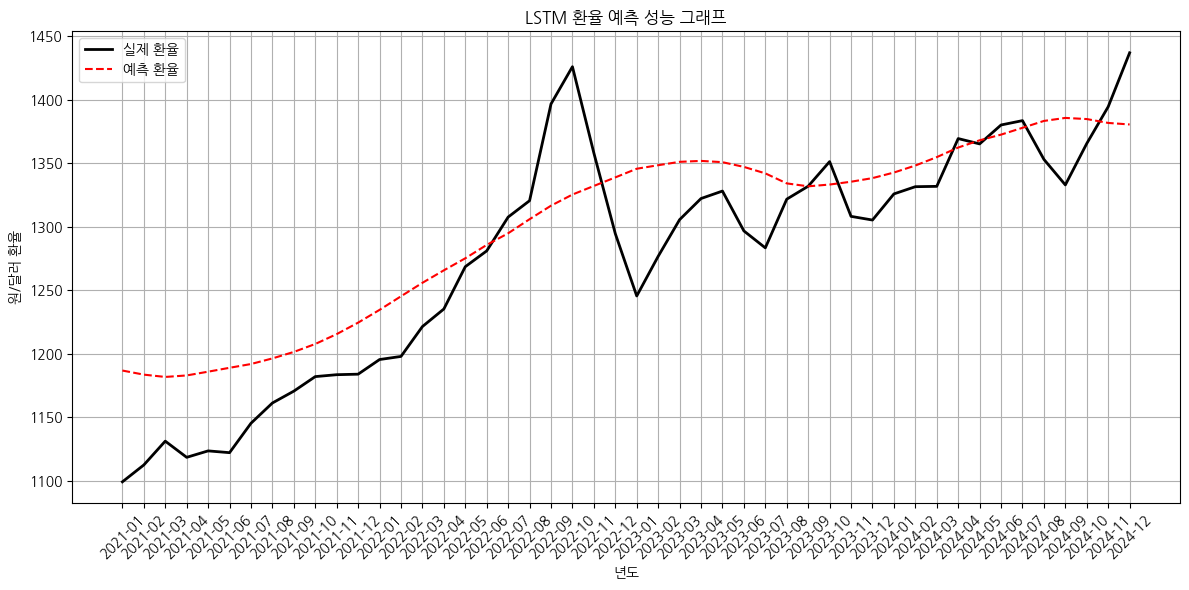

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

<ipython-input-123-3956b8bb032f>:166: UserWarning:

This axis already has a converter set and is updating to a potentially incompatible converter



TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x78476df5e350>.

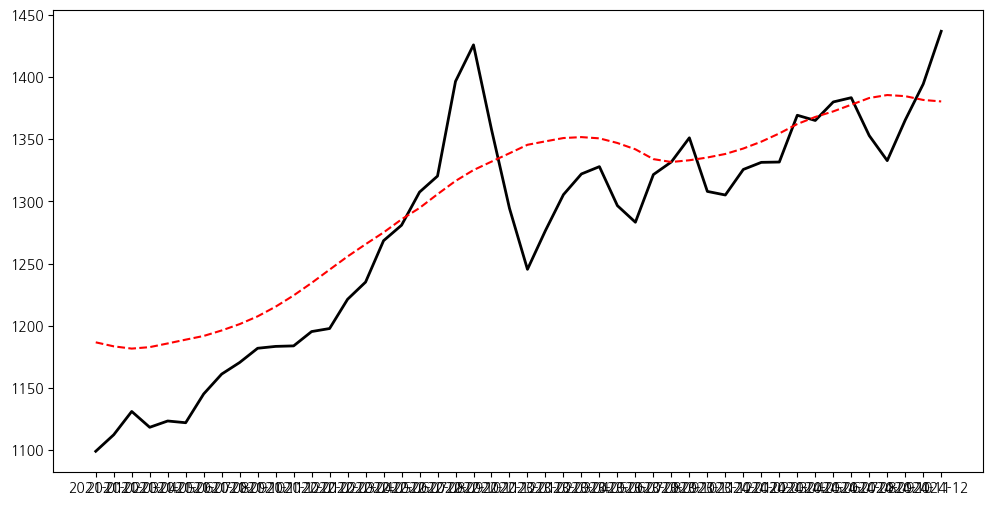

In [123]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
import copy

# === ÏãúÎìú Í≥†Ï†ï ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

X = df[features].ffill().bfill()
y = df[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# === baseline Î™®Îç∏ ===
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
          callbacks=[early_stop], verbose=0)

y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_seq)

baseline_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# === Permutation Importance ===
importance_results = {}
for col_idx in range(X_test_scaled.shape[1]):
    X_test_perm = copy.deepcopy(X_test_seq)
    for i in range(X_test_perm.shape[0]):
        np.random.shuffle(X_test_perm[:, :, col_idx])

    y_pred_perm_scaled = model.predict(X_test_perm)
    y_pred_perm = scaler_y.inverse_transform(y_pred_perm_scaled)
    perm_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_perm))
    importance = perm_rmse - baseline_rmse
    importance_results[col_idx] = importance

# ÏÉÅÏúÑ 10Í∞ú feature ÏÑ†ÌÉù
sorted_importance = sorted(importance_results.items(), key=lambda x: x[1], reverse=True)
top_10_indices = [idx for idx, _ in sorted_importance[:10]]
top_10_features = [features[idx] for idx in top_10_indices]

print("\n‚úÖ Top 10 Important Features:")
for feat in top_10_features:
    print(f"- {feat}")

# === Top 10 featureÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ ===
X_train_top = X_train_scaled[:, top_10_indices]
X_test_top = X_test_scaled[:, top_10_indices]

X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

model_top = Sequential()
model_top.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
model_top.add(LSTM(32, activation='relu'))
model_top.add(Dense(1))
model_top.compile(optimizer='adam', loss='mse')

model_top.fit(X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
              validation_data=(X_test_seq_top, y_test_seq_top),
              callbacks=[early_stop], verbose=0)

y_pred_top_scaled = model_top.predict(X_test_seq_top)
y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

rmse = np.sqrt(mean_squared_error(y_test_actual_top, y_pred_top))
mae = mean_absolute_error(y_test_actual_top, y_pred_top)
r2 = r2_score(y_test_actual_top, y_pred_top)

print(f"\n‚úÖ Final model Performance (Top 10 Features)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R¬≤: {r2:.4f}")

# === ÏÑ±Îä• Í∑∏ÎûòÌîÑ ===
test_dates_full = df.loc[X_test.index, 'TIME'].reset_index(drop=True)
test_dates = test_dates_full[12:]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual_top, label='Ïã§Ï†ú ÌôòÏú®', color='black', linewidth=2)
plt.plot(test_dates, y_pred_top, label='ÏòàÏ∏° ÌôòÏú®', linestyle='--', color='red')
plt.title('LSTM ÌôòÏú® ÏòàÏ∏° ÏÑ±Îä• Í∑∏ÎûòÌîÑ')
plt.xlabel('ÎÖÑÎèÑ')
plt.ylabel('Ïõê/Îã¨Îü¨ ÌôòÏú®')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === ÎØ∏Îûò 3Í∞úÏõî ÏòàÏ∏° ===
last_input_seq = X_test_top[-12:].reshape(1, 12, X_test_top.shape[1])
future_preds_scaled = []

for _ in range(13):
    future_pred_scaled = model_top.predict(last_input_seq)
    future_preds_scaled.append(future_pred_scaled[0])
    last_input_seq = np.append(last_input_seq[:, 1:, :], last_input_seq[:, -1:, :], axis=1)

future_preds = scaler_y.inverse_transform(np.array(future_preds_scaled))

# ÎØ∏Îûò ÎÇ†Ïßú ÏÉùÏÑ±
last_date = pd.to_datetime(test_dates.iloc[-1])
future_dates = [last_date + MonthBegin(i) for i in range(1, 14)]
future_dates = pd.to_datetime(future_dates,format='%b-%y')

print("\n‚úÖ Future 3-Month Forecasted Exchange Rates:")
for i, (date, pred) in enumerate(zip(future_dates, future_preds.flatten()), 1):
    print(f"Month {i} ({date.strftime('%Y-%m')}): {pred:.4f} KRW/USD")

# === ÎØ∏Îûò ÏòàÏ∏° Í∑∏ÎûòÌîÑ ===
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual_top, label='Ïã§Ï†ú ÌôòÏú®', color='black', linewidth=2)
plt.plot(test_dates, y_pred_top, label='ÏòàÏ∏° ÌôòÏú®', linestyle='--', color='red')
plt.plot(future_dates, future_preds, label='12Í∞úÏõî ÏòàÏ∏° ÌôòÏú®', linestyle=':', color='blue', marker='o')
plt.title('LSTM ÌôòÏú® ÏòàÏ∏°')
plt.xlabel('ÎÖÑÎèÑ')
plt.ylabel('Ïõê/Îã¨Îü¨ ÌôòÏú®')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === ÎØ∏Îûò ÏòàÏ∏°Í∞í DataFrame ÏÉùÏÑ± ===
future_df = pd.DataFrame({
    'Month': [date.strftime('%Y-%m') for date in future_dates],
    'Predicted_Exchange_Rate': future_preds.flatten()
})

## Îã®Í∏∞/Ï§ëÍ∏∞ ÏÑ±Îä• ÌôïÏù∏

In [124]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Í∞ÄÏ†ï: Ïã§Ï†ú ÌôòÏú®Í∞í (2025ÎÖÑ 1Ïõî~5Ïõî) ‚Äî Ïã§Ï†úÎ°úÎäî ÏÇ¨Ïö©ÏûêÍ∞Ä Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Ïó¨Í∏∞Ïóê ÎåÄÏûÖ
actual_values_dict = {
    '2024-12': 1434.42,
    '2025-01': 1455.79,
    '2025-02': 1445.56,
    '2025-03': 1457.35,
    '2025-04': 1439.54,
    '2025-05': 1398.13
}
actual_df = pd.DataFrame({
    'Month': list(actual_values_dict.keys()),
    'Actual_Exchange_Rate': list(actual_values_dict.values())
})

# ÏòàÏ∏°Í∞íÏù¥ Îì§Ïñ¥ÏûàÎäî future_dfÏóêÏÑú 2025ÎÖÑ 1Ïõî~5Ïõî Í∞íÎßå Ï∂îÏ∂ú
merged_df = pd.merge(future_df, actual_df, on='Month')

# Îã®Í∏∞ / Ï§ëÍ∏∞ Íµ¨Î∂Ñ
merged_df['Íµ¨Í∞Ñ'] = merged_df['Month'].apply(
    lambda x: 'Îã®Í∏∞ (1~3Ïõî)' if x in ['2025-01', '2025-02', '2025-03'] else 'Ï§ëÍ∏∞ (4~5Ïõî)'
)

# Íµ¨Í∞ÑÎ≥Ñ ÏÑ±Îä• Í≥ÑÏÇ∞
short = merged_df[merged_df['Íµ¨Í∞Ñ'] == 'Îã®Í∏∞ (1~3Ïõî)']
mid = merged_df[merged_df['Íµ¨Í∞Ñ'] == 'Ï§ëÍ∏∞ (4~5Ïõî)']

results = pd.DataFrame([
    {
        'Íµ¨Í∞Ñ': 'Îã®Í∏∞ (1~3Ïõî)',
        'RMSE': np.sqrt(mean_squared_error(short['Actual_Exchange_Rate'], short['Predicted_Exchange_Rate'])),
        'MAE': mean_absolute_error(short['Actual_Exchange_Rate'], short['Predicted_Exchange_Rate']),
        'R2 Score': r2_score(short['Actual_Exchange_Rate'], short['Predicted_Exchange_Rate'])
    },
    {
        'Íµ¨Í∞Ñ': 'Ï§ëÍ∏∞ (4~5Ïõî)',
        'RMSE': np.sqrt(mean_squared_error(mid['Actual_Exchange_Rate'], mid['Predicted_Exchange_Rate'])),
        'MAE': mean_absolute_error(mid['Actual_Exchange_Rate'], mid['Predicted_Exchange_Rate']),
        'R2 Score': r2_score(mid['Actual_Exchange_Rate'], mid['Predicted_Exchange_Rate'])
    }
])

print(results)


          Íµ¨Í∞Ñ       RMSE        MAE    R2 Score
0  Îã®Í∏∞ (1~3Ïõî)  73.909705  73.696916 -198.779268
1  Ï§ëÍ∏∞ (4~5Ïõî)  46.849757  41.889382   -4.119932


# ÎÇ¥Í∞Ä Ìïú LSTM(Í≥ºÏ†ÅÌï©ÏóÜÏï†Í∏∞)

In [125]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import copy

# === ÏãúÎìú Í≥†Ï†ï ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

X = df[features].ffill().bfill()
y = df[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# === baseline Î™®Îç∏ ===
model2 = Sequential()
model2.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model2.add(Dropout(0.3))
model2.add(LSTM(32))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model2.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
          callbacks=[early_stop], verbose=0)

y_pred_scaled = model2.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_seq)
baseline_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# === Permutation Importance ===
importance_results = {}
for col_idx in range(X_test_scaled.shape[1]):
    X_test_perm = copy.deepcopy(X_test_seq)
    for i in range(X_test_perm.shape[0]):
        np.random.shuffle(X_test_perm[:, :, col_idx])

    y_pred_perm_scaled = model2.predict(X_test_perm)
    y_pred_perm = scaler_y.inverse_transform(y_pred_perm_scaled)
    perm_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_perm))
    importance = perm_rmse - baseline_rmse
    importance_results[col_idx] = importance

# Ï§ëÏöîÎèÑ ÏàúÏúÑ
sorted_importance = sorted(importance_results.items(), key=lambda x: x[1], reverse=True)
sorted_indices = [idx for idx, _ in sorted_importance]
sorted_features = [features[idx] for idx in sorted_indices]

print("\n‚úÖ Feature Importance Ranking (Top to Bottom):")
for feat, idx in zip(sorted_features, sorted_indices):
    print(f"- {feat}: Importance = {importance_results[idx]:.4f}")

# === Ïã§Ìóò: ÏÉÅÏúÑ 3, 5, 10, 15Í∞ú ÎπÑÍµê ===
results = []

for top_n in [3, 5, 10, 15]:
    selected_indices = sorted_indices[:top_n]
    selected_feats = [features[i] for i in selected_indices]

    X_train_top = X_train_scaled[:, selected_indices]
    X_test_top = X_test_scaled[:, selected_indices]

    X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
    X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

    model2_top = Sequential()
    model2_top.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
    model2_top.add(Dropout(0.3))
    model2_top.add(LSTM(32))
    model2_top.add(Dropout(0.3))
    model2_top.add(Dense(1))
    model2_top.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    model2_top.fit(X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
                  validation_data=(X_test_seq_top, y_test_seq_top),
                  callbacks=[early_stop], verbose=0)

    y_pred_top_scaled = model2_top.predict(X_test_seq_top)
    y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
    y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

    rmse = np.sqrt(mean_squared_error(y_test_actual_top, y_pred_top))
    mae = mean_absolute_error(y_test_actual_top, y_pred_top)
    r2 = r2_score(y_test_actual_top, y_pred_top)

    results.append({
        'Top_N_Features': top_n,
        'Selected_Features': selected_feats,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# === Í≤∞Í≥º Ï∂úÎ†• ===
print("\n‚úÖ Final Results Comparison:")
for res in results:
    print(f"\n‚ñ∂ Top {res['Top_N_Features']} Features")
    print(f"Selected: {res['Selected_Features']}")
    print(f"RMSE: {res['RMSE']:.4f}")
    print(f"MAE: {res['MAE']:.4f}")
    print(f"R¬≤: {res['R2']:.4f}")

# === Top 10 featureÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ ===
top_10_indices = sorted_indices[:10]
X_train_top = X_train_scaled[:, top_10_indices]
X_test_top = X_test_scaled[:, top_10_indices]

X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

model2_top = Sequential()
model2_top.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
model2_top.add(Dropout(0.3))
model2_top.add(LSTM(32))
model2_top.add(Dropout(0.3))
model2_top.add(Dense(1))
model2_top.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model2_top.fit(
    X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
              validation_data=(X_test_seq_top, y_test_seq_top),
              callbacks=[early_stop], verbose=0)

y_pred_top_scaled = model2_top.predict(X_test_seq_top)
y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

rmse = np.sqrt(mean_squared_error(y_test_actual_top, y_pred_top))
mae = mean_absolute_error(y_test_actual_top, y_pred_top)
r2 = r2_score(y_test_actual_top, y_pred_top)

print(f"\n‚úÖ Final Model2 Performance (Top 10 Features)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R¬≤: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 229ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 451ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 221ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 220ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 248ms/step

‚úÖ Final Results Comparison:

‚ñ∂ Top 3 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò']
RMSE: 91.3010
MAE: 75.7663
R¬≤: 0.0171

‚ñ∂ Top 5 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÏïÑÏó∞ Í∞ÄÍ≤©']
RMSE: 47.8573
MAE: 39.3900
R¬≤: 0.7299

‚ñ∂ Top 10 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'Í∏à Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®']
RMSE: 42.7931
MAE: 31.2708
R¬≤: 0.7841

‚ñ∂ Top 15 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'M2', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'Í∏à Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°', 'ÌïúÍµ≠

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 267ms/step

‚úÖ Final Model2 Performance (Top 10 Features)
RMSE: 51.8807
MAE: 43.2326
R¬≤: 0.6826


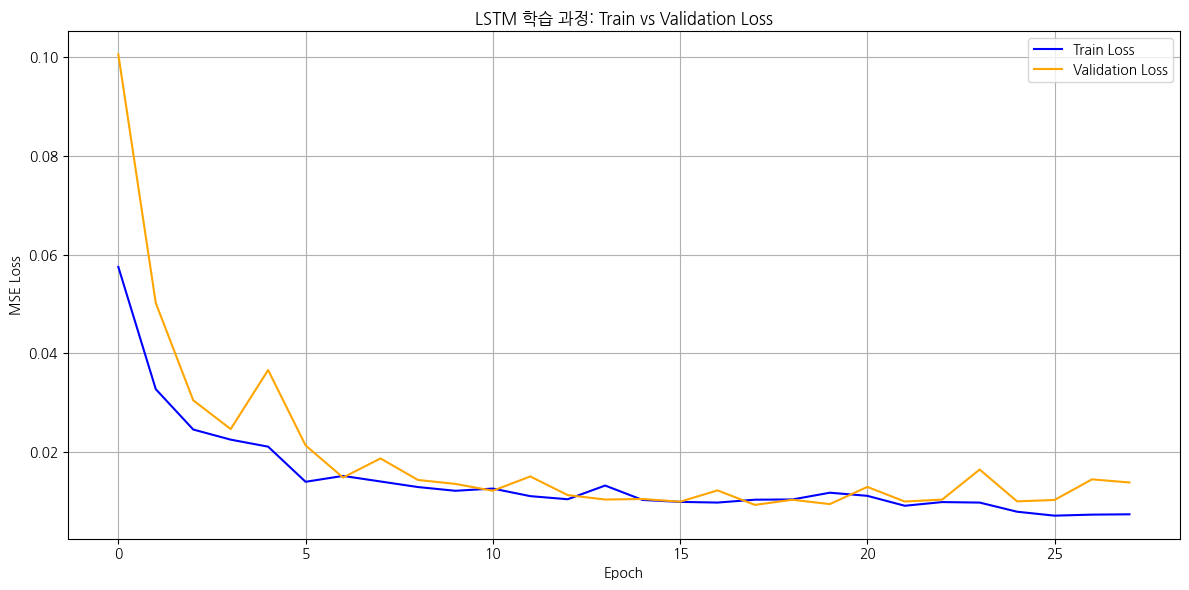

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM ÌïôÏäµ Í≥ºÏ†ï: Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 218ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 249ms/step


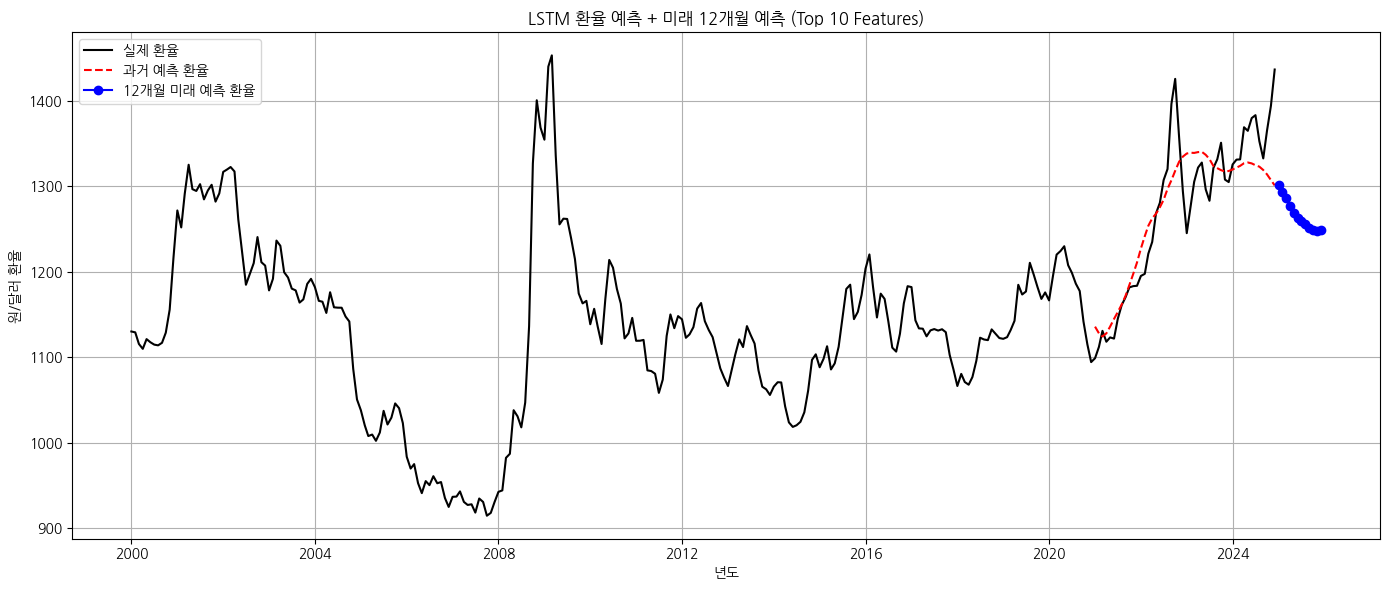

In [127]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import copy

# === ÏãúÎìú Í≥†Ï†ï ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === ÎÇ†Ïßú Ïù∏Îç±Ïä§Î°ú ÏßÄÏ†ï ===
df["TIME"] = pd.to_datetime(df["TIME"])  # ÌïÑÏöî Ïãú
df.set_index("TIME", inplace=True)

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

X = df[features].ffill().bfill()
y = df[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# === Î™®Îç∏ ÌïôÏäµ ===
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
          callbacks=[early_stop], verbose=0)

# === Permutation Importance Í∏∞Î∞ò ÏÉÅÏúÑ 10Í∞ú Î≥ÄÏàò ÏÑ†ÌÉù ===
baseline_rmse = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test_seq),
                                            scaler_y.inverse_transform(model.predict(X_test_seq))))
importance_results = {}
for col_idx in range(X_test_scaled.shape[1]):
    X_test_perm = copy.deepcopy(X_test_seq)
    for i in range(X_test_perm.shape[0]):
        np.random.shuffle(X_test_perm[:, :, col_idx])
    y_pred_perm = model.predict(X_test_perm)
    rmse = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test_seq),
                                      scaler_y.inverse_transform(y_pred_perm)))
    importance_results[col_idx] = rmse - baseline_rmse

sorted_indices = sorted(importance_results, key=importance_results.get, reverse=True)
top_10_indices = sorted_indices[:10]

# === Top 10 Î≥ÄÏàòÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ ===
X_train_top = X_train_scaled[:, top_10_indices]
X_test_top = X_test_scaled[:, top_10_indices]
X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

model_top = Sequential()
model_top.add(LSTM(64, return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
model_top.add(Dropout(0.3))
model_top.add(LSTM(32))
model_top.add(Dropout(0.3))
model_top.add(Dense(1))
model_top.compile(optimizer='adam', loss='mse')

history = model_top.fit(X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
                        validation_data=(X_test_seq_top, y_test_seq_top),
                        callbacks=[early_stop], verbose=0)

# === Í≥ºÍ±∞ ÏòàÏ∏° Í≤∞Í≥º
y_pred_top_scaled = model_top.predict(X_test_seq_top)
y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

# === ÎØ∏Îûò 12Í∞úÏõî ÏòàÏ∏° (Recursive)
last_sequence = X_test_seq_top[-1]
future_preds_scaled = []

for _ in range(12):
    pred_scaled = model_top.predict(last_sequence[np.newaxis, :, :], verbose=0)
    future_preds_scaled.append(pred_scaled[0])
    new_input = np.vstack([last_sequence[1:], last_sequence[-1]])  # Íµ¨Ï°∞Îßå Ïú†ÏßÄ
    last_sequence = new_input

future_preds = scaler_y.inverse_transform(np.array(future_preds_scaled)).flatten()

# === ÏãúÍ∞ÅÌôî
past_pred_dates = df.index[-len(y_pred_top):]
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=12, freq='MS')

plt.figure(figsize=(14, 6))
plt.plot(df.index, df[target], label='Ïã§Ï†ú ÌôòÏú®', color='black')
plt.plot(past_pred_dates, y_pred_top, linestyle='--', label='Í≥ºÍ±∞ ÏòàÏ∏° ÌôòÏú®', color='red')
plt.plot(future_dates, future_preds, 'o-', label='12Í∞úÏõî ÎØ∏Îûò ÏòàÏ∏° ÌôòÏú®', color='blue')
plt.title("LSTM ÌôòÏú® ÏòàÏ∏° + ÎØ∏Îûò 12Í∞úÏõî ÏòàÏ∏° (Top 10 Features)")
plt.xlabel("ÎÖÑÎèÑ")
plt.ylabel("Ïõê/Îã¨Îü¨ ÌôòÏú®")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Ï∂îÍ∞Ä ÌîÑÎ°úÏ†ùÌä∏-ÏõêÏûêÏû¨Í∞ÄÍ≤© ÏòàÏ∏°ÏùÑ ÌÜµÌïú ÏàòÏûÖÎã®Í∞Ä Í≥ÑÏÇ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò

## ÏõêÏûêÏû¨ Í∞ÄÍ≤© ÏòàÏ∏°(Prophet)-Ï≤†Í¥ëÏÑù

In [128]:
df = pd.read_csv('/content/drive/MyDrive/LIKELION_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®/datathon/final.csv')

In [129]:
%%capture
!pip install prophet

In [130]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     300 non-null    int64  
 1   TIME           300 non-null    object 
 2   Ïõê/Îã¨Îü¨ÌôòÏú®         300 non-null    float64
 3   ÌïúÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    291 non-null    float64
 4   ÎØ∏Íµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 5   Ï§ëÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    132 non-null    float64
 6   ÌïúÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64
 7   ÎØ∏Íµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64
 8   Ï§ëÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64
 9   Ï†ÑÏ≤¥ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 10  ÎØ∏Íµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 11  Ï§ëÍµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64  
 12  Ï†ÑÏ≤¥ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 13  ÎØ∏Íµ≠ ÏàòÏûÖ Ï¥ùÏï°       300 non-null    int64  
 14  Ï§ëÍµ≠ ÏàòÏûÖ Ï¥ùÏï°

In [132]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df['TIME'] = pd.to_datetime(df['TIME'])

# ProphetÏóê ÎßûÎäî Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÍ≤Ω: 'ds' = ÎÇ†Ïßú, 'y' = ÏòàÏ∏° ÎåÄÏÉÅ
df_prophet = df[['TIME', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©']].rename(columns={
    'TIME': 'ds',
    'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©': 'y'
})

# üîΩ 2000ÎÖÑ Ïù¥ÌõÑÎ°ú ÌïÑÌÑ∞ÎßÅ
df_prophet = df_prophet[df_prophet['ds'] >= '2000-01-01']

# Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ (Ï§ëÏöî!)
df_prophet['y'] = df_prophet['y'].fillna(method='ffill').fillna(method='bfill')


<ipython-input-132-f5815ec3030d>:16: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [133]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0bo_9e6/fggsqa2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0bo_9e6/r5nr4u7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93162', 'data', 'file=/tmp/tmpc0bo_9e6/fggsqa2v.json', 'init=/tmp/tmpc0bo_9e6/r5nr4u7k.json', 'output', 'file=/tmp/tmpc0bo_9e6/prophet_modelkykmbten/prophet_model-20250512081755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


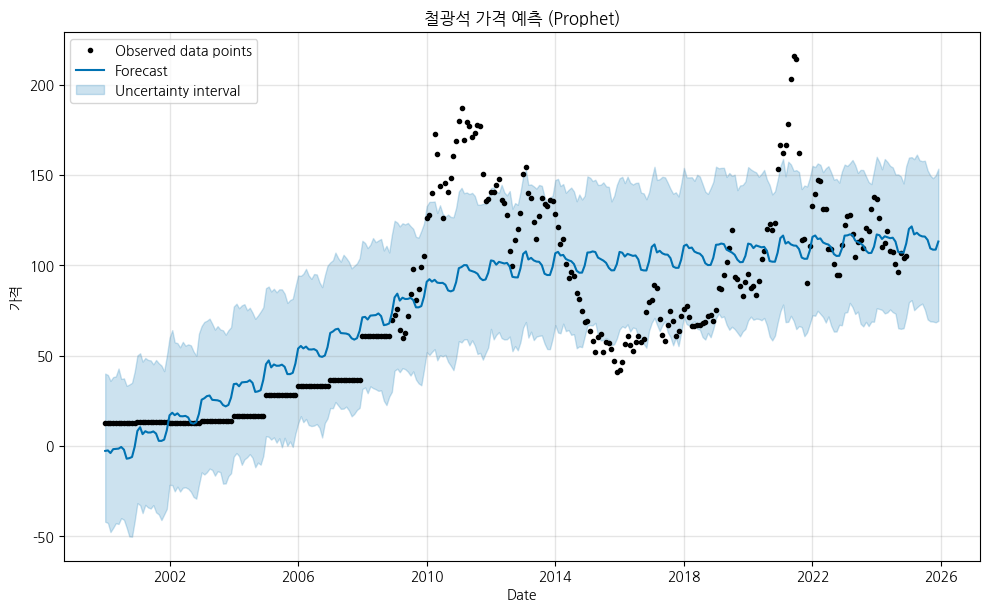

In [134]:
# Ïòà: 12Í∞úÏõî Ïù¥ÌõÑÍπåÏßÄ ÏòàÏ∏°
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

model.plot(forecast)
plt.title('Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© ÏòàÏ∏° (Prophet)')
plt.xlabel('Date')
plt.ylabel('Í∞ÄÍ≤©')
plt.grid(True)
plt.legend()
plt.show()


- Í≤ÄÏ†ï Ï†ê: Ïã§Ï†ú
- ÌååÎûÄ ÏÑ†: ÏòàÏ∏°
- ÌååÎûÄ ÏòÅÏó≠: Ïã†Î¢∞Íµ¨Í∞Ñ(95%)

In [135]:
# 1. forecast + Ïã§Ï†úÍ∞í df_prophet merge
forecast_eval = pd.merge(
    forecast[['ds', 'yhat']],
    df_prophet[['ds', 'y']],
    on='ds',
    how='left'
)

# 2. Ïã§Ï†úÍ∞í ÏûàÎäî Íµ¨Í∞ÑÎßå ÎÇ®Í∏∞Í∏∞
#eval_df = forecast_eval.dropna(subset=['y'])
eval_df = forecast_eval

# 3. ÏµúÍ∑º 12Í∞úÏõî Í∏∞Ï§ÄÏúºÎ°ú tail
recent_12_months = eval_df.tail(24)
recent_12_months.reset_index(drop=True, inplace=True)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print(recent_12_months)


           ds        yhat       y
0  2024-01-01  117.056777  136.59
1  2024-02-01  116.635842  125.93
2  2024-03-01  114.553545  110.19
3  2024-04-01  116.040221  112.23
4  2024-05-01  115.504677  119.24
5  2024-06-01  114.996160  108.10
6  2024-07-01  115.255107  107.39
7  2024-08-01  113.107674  100.91
8  2024-09-01  107.412898   96.24
9  2024-10-01  107.058567  106.61
10 2024-11-01  107.031764  103.98
11 2024-12-01  112.027935  105.34
12 2025-01-01  120.104942     NaN
13 2025-02-01  121.504489     NaN
14 2025-03-01  117.059366     NaN
15 2025-04-01  117.985364     NaN
16 2025-05-01  116.616908     NaN
17 2025-06-01  115.986513     NaN
18 2025-07-01  115.889614     NaN
19 2025-08-01  114.030407     NaN
20 2025-09-01  109.324734     NaN
21 2025-10-01  108.647633     NaN
22 2025-11-01  108.677030     NaN
23 2025-12-01  113.145135     NaN


In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í merge
forecast_eval = pd.merge(
    forecast[['ds', 'yhat']],
    df_prophet[['ds', 'y']],
    on='ds',
    how='left'
)

# 2. 2000ÎÖÑ Ïù¥ÌõÑÎ°ú ÌïÑÌÑ∞ÎßÅ
forecast_eval = forecast_eval[forecast_eval['ds'] >= '2000-01-01']

# 3. Ïã§Ï†úÍ∞í ÏûàÎäî Íµ¨Í∞ÑÎßå ÎπÑÍµê
eval_df = forecast_eval.dropna(subset=['y'])

# 4. ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
y_true = eval_df['y']
y_pred = eval_df['yhat']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"üìä Prophet Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© ÏòàÏ∏° ÏÑ±Îä•:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤  : {r2:.4f}")


üìä Prophet Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© ÏòàÏ∏° ÏÑ±Îä•:
MAE : 24.87
RMSE: 32.12
R¬≤  : 0.5955


## ÎÖºÎ¨∏ ÎÇ¥Ïö© Í∏∞Î∞ò

In [137]:
import pandas as pd

# ÌååÏùº Í≤ΩÎ°ú
crb_path = '/content/drive/MyDrive/LIKELION_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®/datathon/CRB.csv'

crb_df = pd.read_csv(crb_path)

# Ïó¥ Ïù¥Î¶Ñ ÌôïÏù∏
print(crb_df.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [138]:
# ÎÇ†Ïßú ÌòïÏãù ÌÜµÏùº
crb_df['Date'] = pd.to_datetime(crb_df['Date'])
crb_df = crb_df.rename(columns={'Date': 'TIME', 'Price': 'crb_price'})
crb_df = crb_df[['TIME', 'crb_price']].sort_values('TIME')

# 2. Í∏∞Ï°¥ dfÎèÑ datetimeÏúºÎ°ú ÎßûÏ∂§
df['TIME'] = pd.to_datetime(df['TIME'])

# 3. Î≥ëÌï©
df = pd.merge(df, crb_df, on='TIME', how='left')

# 4. ÌôïÏù∏
print(df[['TIME', 'crb_price']].head())

        TIME  crb_price
0 2000-01-01     125.78
1 2000-02-01     129.98
2 2000-03-01     130.84
3 2000-04-01     129.71
4 2000-05-01     141.10


In [139]:
df['crb_price'].isnull().sum()

np.int64(0)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     300 non-null    int64         
 1   TIME           300 non-null    datetime64[ns]
 2   Ïõê/Îã¨Îü¨ÌôòÏú®         300 non-null    float64       
 3   ÌïúÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    291 non-null    float64       
 4   ÎØ∏Íµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64       
 5   Ï§ëÍµ≠ Ïû•Í∏∞ ÏãúÏû• Í∏àÎ¶¨    132 non-null    float64       
 6   ÌïúÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    300 non-null    float64       
 7   ÎØ∏Íµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64       
 8   Ï§ëÍµ≠ Îã®Í∏∞ ÏãúÏû• Í∏àÎ¶¨    299 non-null    float64       
 9   Ï†ÑÏ≤¥ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64         
 10  ÎØ∏Íµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64         
 11  Ï§ëÍµ≠ ÏàòÏ∂ú Ï¥ùÏï°       300 non-null    int64         
 12  Ï†ÑÏ≤¥ ÏàòÏûÖ Ï¥ùÏï°       300 non

In [141]:
from statsmodels.tsa.stattools import adfuller

# 1. ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉùÏÑ± (3Í∞úÏõî Îí§ Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©)
df['Ï≤†Í¥ëÏÑù_ÌÉÄÍ≤ü'] = df['Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©'].shift(-3)

# 2. Îã§Î≥ÄÎüâ ÌõÑÎ≥¥ Î≥ÄÏàò Î¶¨Ïä§Ìä∏
candidate_vars = [
    'ÎãàÏºà Í∞ÄÍ≤©',
    'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
    'Brent Ïú†Í∞Ä',
    'WTI Ïú†Í∞Ä',
    'Ïõê/Îã¨Îü¨ÌôòÏú®',
    'Í∏à Í∞ÄÍ≤©',
    'ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò',
    'crb_price'
]

# 3. ADF Test + Ï∞®Î∂Ñ ÏûêÎèôÌôî Ìï®Ïàò Ï†ïÏùò
def adf_test_and_diff(df, var_list):
    result_dict = {}
    for var in var_list:
        series = df[var].dropna()
        adf_result = adfuller(series)
        p_val = adf_result[1]
        diff_count = 0

        # Ï∞®Î∂ÑÏù¥ ÌïÑÏöîÌïòÎ©¥ Î∞òÎ≥µ
        while p_val >= 0.05 and diff_count < 3:
            series = series.diff().dropna()
            adf_result = adfuller(series)
            p_val = adf_result[1]
            diff_count += 1

        result_dict[var] = {
            'adf_stat': adf_result[0],
            'p_value': p_val,
            'diff_count': diff_count
        }

    return pd.DataFrame(result_dict).T

# 4. Ïã§Ìñâ
adf_results = adf_test_and_diff(df, candidate_vars)
adf_results


adf_stat       p_value  diff_count
ÎãàÏºà Í∞ÄÍ≤©       -10.264452  4.154336e-18         1.0
ÎëêÎ∞îÏù¥ Ïú†Í∞Ä       -9.451089  4.614352e-16         1.0
Brent Ïú†Í∞Ä    -11.906170  5.429802e-22         1.0
WTI Ïú†Í∞Ä       -2.979097  3.689308e-02         0.0
Ïõê/Îã¨Îü¨ÌôòÏú®      -12.372880  5.233364e-23         1.0
Í∏à Í∞ÄÍ≤©        -13.632044  1.715966e-25         1.0
ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò  -3.030882  3.210936e-02         1.0
crb_price    -9.835672  4.903028e-17         1.0

üîé ADF ÌÖåÏä§Ìä∏ + Ï∞®Î∂Ñ Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌïú Ïù¥Ïú†: ÏãúÍ≥ÑÏó¥Ïùò Ï†ïÏÉÅÏÑ± ÌôïÎ≥¥

Ï†ïÏÉÅÏÑ±Ïù¥ÎûÄ?

: ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎèÑ ÌèâÍ∑†, Î∂ÑÏÇ∞, Í≥µÎ∂ÑÏÇ∞Ïù¥ ÏùºÏ†ïÌïú ÏÉÅÌÉú

- ADFÌÖåÏä§Ìä∏ ‚Üí Ï†ïÏÉÅÏÑ± Ïó¨Î∂Ä ÌåêÎã®(p-value < 0.05Î©¥ Ï†ïÏÉÅ)

- Ï∞®Î∂Ñ(differencing) ‚Üí ÎπÑÏ†ïÏÉÅ ÏãúÍ≥ÑÏó¥ÏùÑ Ï†ïÏÉÅÏúºÎ°ú Î∞îÍæ∏Í∏∞ ÏúÑÌïú ÏàòÌïôÏ†Å Î≥ÄÌôò

    - diff_countÍ∞Ä 1 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ = ÎπÑÏ†ïÏÉÅÏãúÍ≥ÑÏó¥Ïù¥ÏßÄÎßå 1Ï∞® Ï∞®Î∂ÑÏúºÎ°ú Ï†ïÏÉÅ Î≥ÄÌôòÌï† Ïàò ÏûàÎäî Î≥ÄÏàò


In [142]:
diff_counts = {k: int(v) for k, v in adf_results['diff_count'].to_dict().items()}

# Ï∞®Î∂ÑÎêú Ïª¨Îüº ÏÉùÏÑ±
for var, d in diff_counts.items():
    if d == 0:
        df[f'{var}_diff'] = df[var]  # Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
    else:
        temp = df[var].copy()
        for i in range(d):
            temp = temp.diff()
        df[f'{var}_diff'] = temp

# ÏÉùÏÑ±Îêú diff Ïª¨ÎüºÎì§ ÌôïÏù∏
diff_columns = [f"{var}_diff" for var in diff_counts.keys()]
df[diff_columns + ['TIME']].head()


ÎãàÏºà Í∞ÄÍ≤©_diff  ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff  Brent Ïú†Í∞Ä_diff  WTI Ïú†Í∞Ä_diff  Ïõê/Îã¨Îü¨ÌôòÏú®_diff  \
0         NaN          NaN            NaN        27.22          NaN   
1     1268.50         1.36           2.40        29.36        -1.03   
2      671.65         0.38          -0.54        29.89       -13.54   
3     -508.90        -2.75          -4.34        25.80        -5.74   
4      376.41         3.28           4.66        28.83        11.36   

   Í∏à Í∞ÄÍ≤©_diff  ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò_diff  crb_price_diff       TIME  
0        NaN               NaN             NaN 2000-01-01  
1      15.65              0.22            4.20 2000-02-01  
2     -12.80              0.37            0.86 2000-03-01  
3      -7.27             -0.30           -1.13 2000-04-01  
4      -2.91             -0.36           11.39 2000-05-01

In [143]:
# ADF test Í≤∞Í≥ºÎ•º Ìëú ÌòïÏãùÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
# Í∏∞Ï°¥Ïóê Ï†ÄÏû•Îêú Í≤∞Í≥º (adf_results)Î•º ÏÇ¨Ïö©

# ADF Î∞è P-value (Ï∞®Î∂Ñ Ï†Ñ) Ï†ÄÏû•
from statsmodels.tsa.stattools import adfuller

adf_table = []

for var in candidate_vars:
    original = df[var].dropna()
    diff = df[f"{var}_diff"].dropna()

    adf_before = adfuller(original)
    adf_after = adfuller(diff)

    adf_table.append({
        'Î≥ÄÏàòÎ™Ö': var,
        'Ï∞®Î∂Ñ ÌöüÏàò': diff_counts[var],
        'Ï∞®Î∂Ñ Ï†Ñ ADF': round(adf_before[0], 4),
        'Ï∞®Î∂Ñ Ï†Ñ P-Value': round(adf_before[1], 5),
        'Ï∞®Î∂Ñ ÌõÑ ADF': round(adf_after[0], 4),
        'Ï∞®Î∂Ñ ÌõÑ P-Value': round(adf_after[1], 5),
    })

adf_df_pretty = pd.DataFrame(adf_table)
display(adf_df_pretty)


Î≥ÄÏàòÎ™Ö  Ï∞®Î∂Ñ ÌöüÏàò  Ï∞®Î∂Ñ Ï†Ñ ADF  Ï∞®Î∂Ñ Ï†Ñ P-Value  Ï∞®Î∂Ñ ÌõÑ ADF  Ï∞®Î∂Ñ ÌõÑ P-Value
0        ÎãàÏºà Í∞ÄÍ≤©      1   -2.5610       0.10132  -10.2645       0.00000
1       ÎëêÎ∞îÏù¥ Ïú†Í∞Ä      1   -2.7578       0.06455   -9.4511       0.00000
2     Brent Ïú†Í∞Ä      1   -2.6964       0.07467  -11.9062       0.00000
3       WTI Ïú†Í∞Ä      0   -2.9791       0.03689   -2.9791       0.03689
4       Ïõê/Îã¨Îü¨ÌôòÏú®      1   -1.7199       0.42087  -12.3729       0.00000
5         Í∏à Í∞ÄÍ≤©      1    0.7347       0.99051  -13.6320       0.00000
6  ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò      1   -0.1243       0.94697   -3.0309       0.03211
7    crb_price      1   -2.1570       0.22222   -9.8357       0.00000

ADFÌÖåÏä§Ìãë t-ÌÜµÍ≤åÎüâ Í≥ÑÏó¥Î°ú
ÌÜµÍ≥ÑÎüâ ÏûêÏ≤¥Í∞Ä ÏûëÏùÑÏàòÎ°ù (ÏùåÏàòÎ°ú Í∞àÏàòÎ°ù) Ï†ïÏÉÅÏÑ±Ïóê Îçî Í∞ïÌïòÎã§ÎùºÎäî Îúª

In [144]:
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# ÌÉÄÍ≤ü Î≥ÄÏàò
target = 'Ï≤†Í¥ëÏÑù_ÌÉÄÍ≤ü'

# Ï∞®Î∂ÑÎêú Î≥ÄÏàò Î¶¨Ïä§Ìä∏
feature_vars = [
    'ÎãàÏºà Í∞ÄÍ≤©_diff', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff', 'Brent Ïú†Í∞Ä_diff', 'WTI Ïú†Í∞Ä_diff',
    'Ïõê/Îã¨Îü¨ÌôòÏú®_diff', 'Í∏à Í∞ÄÍ≤©_diff', 'ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò_diff', 'crb_price_diff'
]

# Ï°∞Ìï© ÏÉùÏÑ±
all_combos = []
for r in range(2, len(feature_vars) + 1):
    all_combos += list(combinations(feature_vars, r))

# Í≤∞Í≥º Ï†ÄÏû•
results = []

# Ïã§Ìñâ Î£®ÌîÑ
for combo in all_combos:
    # Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
    subset = list(combo) + [target]
    df_subset = df[subset].dropna()

    # train-test split
    X = df_subset.drop(columns=[target])
    y = df_subset[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Î™®Îç∏ ÌïôÏäµ
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ÌèâÍ∞Ä ÏßÄÌëú
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results.append({
        "Ï°∞Ìï©": combo,
        "MAE": mae,
        "MAPE": mape
    })

# Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='MAPE')

# ÏÉÅÏúÑ 3Í∞ú Ï°∞Ìï©
top_3 = results_df_sorted.head(3)
# ÌïòÏúÑ 3Í∞ú Ï°∞Ìï©
bottom_3 = results_df_sorted.tail(3)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ [ÏÉÅÏúÑ 3Í∞ú Ï°∞Ìï©]")
print(top_3)
print("\n‚ùå [ÌïòÏúÑ 3Í∞ú Ï°∞Ìï©]")
print(bottom_3)


‚úÖ [ÏÉÅÏúÑ 3Í∞ú Ï°∞Ìï©]
                                                    Ï°∞Ìï©        MAE       MAPE
198  (ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff, Brent Ïú†Í∞Ä_diff, Í∏à Í∞ÄÍ≤©_diff, ÌïúÍµ≠ ÏÜåÎπÑÏûê...  37.926978  29.196163
126  (ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff, Brent Ïú†Í∞Ä_diff, Í∏à Í∞ÄÍ≤©_diff, ÌïúÍµ≠ ÏÜåÎπÑÏûê...  38.913401  29.297715
138  (ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff, Í∏à Í∞ÄÍ≤©_diff, ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò_diff, crb...  39.196273  30.464372

‚ùå [ÌïòÏúÑ 3Í∞ú Ï°∞Ìï©]
                                Ï°∞Ìï©        MAE       MAPE
24   (Ïõê/Îã¨Îü¨ÌôòÏú®_diff, crb_price_diff)  60.576425  46.587083
6     (ÎãàÏºà Í∞ÄÍ≤©_diff, crb_price_diff)  61.870682  47.941025
5   (ÎãàÏºà Í∞ÄÍ≤©_diff, ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò_diff)  61.976096  48.678614


In [145]:
from sklearn.model_selection import GridSearchCV

# ÏÉÅÏúÑ 1Í∞ú Ï°∞Ìï© ÏÇ¨Ïö©
best_combo = [
    'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff', 'Brent Ïú†Í∞Ä_diff', 'Í∏à Í∞ÄÍ≤©_diff', 'ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò_diff'
]

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
df_best = df[best_combo + ['Ï≤†Í¥ëÏÑù_ÌÉÄÍ≤ü']].dropna()
X_best = df_best[best_combo]
y_best = df_best['Ï≤†Í¥ëÏÑù_ÌÉÄÍ≤ü']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.2, shuffle=False)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Î™®Îç∏ Ï†ïÏùò Î∞è GridSearch
xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3, verbose=0)

grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Î∞è ÏÑ±Îä• ÌôïÏù∏
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

{
    "Best Parameters": best_params,
    "MAE": mae,
    "MAPE": mape,
    "R¬≤": r2
}

{'Best Parameters': {'learning_rate': 0.01,
  'max_depth': 2,
  'n_estimators': 100},
 'MAE': 49.1914598795573,
 'MAPE': np.float64(37.10444976163405),
 'R¬≤': -3.0075379224943095}

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
best_vars = ['ÎëêÎ∞îÏù¥ Ïú†Í∞Ä_diff', 'Brent Ïú†Í∞Ä_diff', 'Í∏à Í∞ÄÍ≤©_diff', 'ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò_diff']
df_best = df[best_vars + ['Ï≤†Í¥ëÏÑù_ÌÉÄÍ≤ü']].dropna()
X = df_best[best_vars]
y = df_best['Ï≤†Í¥ëÏÑù_ÌÉÄÍ≤ü']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ïã§ÌóòÌï† ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©Îì§
param_sets = [
    {"n_estimators": 300, "max_depth": 4, "learning_rate": 0.1},
    {"n_estimators": 500, "max_depth": 5, "learning_rate": 0.05},
    {"n_estimators": 300, "max_depth": 6, "learning_rate": 0.07}
]

# Í≤∞Í≥º Ï†ÄÏû•
for i, params in enumerate(param_sets, 1):
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    print(f"‚öôÔ∏è [ÏÑ∏Ìä∏ {i}] params: {params}")
    print(f"   ‚ñ∂ MAE: {mae:.2f}, MAPE: {mape:.2f}, R¬≤: {r2:.4f}\n")

‚öôÔ∏è [ÏÑ∏Ìä∏ 1] params: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
   ‚ñ∂ MAE: 44.26, MAPE: 34.14, R¬≤: -2.6005

‚öôÔ∏è [ÏÑ∏Ìä∏ 2] params: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}
   ‚ñ∂ MAE: 41.71, MAPE: 32.16, R¬≤: -2.2822

‚öôÔ∏è [ÏÑ∏Ìä∏ 3] params: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.07}
   ‚ñ∂ MAE: 38.84, MAPE: 29.33, R¬≤: -2.0718



In [147]:
param_sets = [
    {"n_estimators": 400, "max_depth": 6, "learning_rate": 0.07},  # ÏÑ∏Ìä∏ 3 Í∏∞Î∞ò Í∞ïÌôî
    {"n_estimators": 500, "max_depth": 5, "learning_rate": 0.07},  # depth Ï§ÑÏù¥Í≥† estimator ÌôïÎåÄ
    {"n_estimators": 600, "max_depth": 4, "learning_rate": 0.09},  # depth ÎÇÆÏ∂îÍ≥† Îπ†Î•¥Í≤å ÌïôÏäµ
]

for i, params in enumerate(param_sets, 1):
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    print(f"‚öôÔ∏è [ÏµúÏ†ÅÌôî ÏÑ∏Ìä∏ {i}] params: {params}")
    print(f"   ‚ñ∂ MAE: {mae:.2f}, MAPE: {mape:.2f}, R¬≤: {r2:.4f}\n")



‚öôÔ∏è [ÏµúÏ†ÅÌôî ÏÑ∏Ìä∏ 1] params: {'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.07}
   ‚ñ∂ MAE: 38.91, MAPE: 29.39, R¬≤: -2.0765

‚öôÔ∏è [ÏµúÏ†ÅÌôî ÏÑ∏Ìä∏ 2] params: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.07}
   ‚ñ∂ MAE: 40.43, MAPE: 31.18, R¬≤: -2.1834

‚öôÔ∏è [ÏµúÏ†ÅÌôî ÏÑ∏Ìä∏ 3] params: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.09}
   ‚ñ∂ MAE: 43.12, MAPE: 33.43, R¬≤: -2.5259



## ARIMA(Îã®Î≥ÄÎüâ)

In [148]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. ÏãúÍ≥ÑÏó¥ Ï§ÄÎπÑ
ts = df[['TIME', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©']].copy()
ts = ts.dropna()
ts.set_index('TIME', inplace=True)

# 2. 1Ï∞® Ï∞®Î∂Ñ
ts['diff'] = ts['Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©'].diff()
ts = ts.dropna()

# 3. ARIMA (p,1,q) ÏûêÎèô ÌÉêÏÉâ
best_score = float('inf')
best_order = None

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(ts['diff'], order=(p, 1, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_score:
                best_score = aic
                best_order = (p, 1, q)
        except:
            continue

print(f"üìå Best ARIMA Order: {best_order} (AIC: {best_score:.2f})")

# 4. Ï†ÑÏ≤¥ Ïû¨ÌïôÏäµ Î∞è ÏòàÏ∏°
model = ARIMA(ts['Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©'], order=best_order)
model_fit = model.fit()

# 5. testÏÖã Ï†ïÏùò (3Í∞úÏõî ÏòàÏ∏°)
n_test = 3
y_pred = model_fit.forecast(steps=n_test)
y_true = df['Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©'].shift(-n_test).dropna().iloc[-n_test:]

# 6. ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\nüìä [ARIMA ÏÑ±Îä• ÌèâÍ∞Ä]")
print(f"‚ñ∂ MAE   : {mae:.2f}")
print(f"‚ñ∂ RMSE  : {rmse:.2f}")
print(f"‚ñ∂ R¬≤     : {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so

üìå Best ARIMA Order: (3, 1, 3) (AIC: 2140.01)

üìä [ARIMA ÏÑ±Îä• ÌèâÍ∞Ä]
‚ñ∂ MAE   : 1.10
‚ñ∂ RMSE  : 1.49
‚ñ∂ R¬≤     : -0.9324


## LSTM

In [149]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. ÏÇ¨Ïö© Î≥ÄÏàò
features = ['ÎãàÏºà Í∞ÄÍ≤©', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Brent Ïú†Í∞Ä', 'WTI Ïú†Í∞Ä', 'Ïõê/Îã¨Îü¨ÌôòÏú®', 'Í∏à Í∞ÄÍ≤©', 'ÌïúÍµ≠ ÏÜåÎπÑÏûê Î¨ºÍ∞ÄÏßÄÏàò', 'crb_price']
target = 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©'

# 2. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Ï†ïÍ∑úÌôî
df = df.dropna(subset=features + [target]).copy()
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features + [target]]), columns=features + [target])
df_scaled['TIME'] = df['TIME'].values  # ÏãúÍ≥ÑÏó¥ Ï†ïÎ≥¥ Ïú†ÏßÄ

# 3. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def create_sequences(data, feature_cols, target_col, input_len=12, pred_gap=3):
    X, y = [], []
    for i in range(len(data) - input_len - pred_gap + 1):
        X.append(data[feature_cols].iloc[i : i+input_len].values)
        y.append(data[target_col].iloc[i+input_len+pred_gap-1])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled, features, target, input_len=12, pred_gap=3)

# 4. train/test Î∂ÑÎ¶¨
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("‚úÖ ÏãúÌÄÄÏä§ ÏÉùÏÑ± ÏôÑÎ£å:", X_train.shape, y_train.shape)


‚úÖ ÏãúÌÄÄÏä§ ÏÉùÏÑ± ÏôÑÎ£å: (228, 12, 8) (228,)


In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 1. Î™®Îç∏ Ï†ïÏùò
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 2. ÌïôÏäµ
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# 3. ÏòàÏ∏°
y_pred = model.predict(X_test)

# 4. ÌèâÍ∞Ä ÏßÄÌëú
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test == 0, 1e-5, y_test))) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"üìä [LSTM ÏÑ±Îä• ÌèâÍ∞Ä]")
print(f"‚ñ∂ MAE  : {mae:.2f}")
print(f"‚ñ∂ MAPE : {mape:.2f}")
print(f"‚ñ∂ RMSE : {rmse:.2f}")
print(f"‚ñ∂ R¬≤    : {r2:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 41ms/step - loss: 0.1023 - val_loss: 0.0107
Epoch 2/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.0326 - val_loss: 0.0053
Epoch 3/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - loss: 0.0266 - val_loss: 0.0038
Epoch 4/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0.0241 - val_loss: 0.0049
Epoch 5/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - loss: 0.0197 - val_loss: 0.0039
Epoch 6/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0177 - val_loss: 0.0038
Epoch 7/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0152 - val_loss: 0.0045
Epoch 8/100
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0089
Epoch 9

# ÏàòÏûÖ Îã®Í∞Ä Í≥ÑÏÇ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò
ÏòàÏ∏°Îêú ÌôòÏú®(LSTM) √ó ÏòàÏ∏°Îêú Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©(Prophet) ‚Üí Îã§ÏùåÎã¨ ÏàòÏûÖÎã®Í∞Ä(ÏõêÌôî)
- prophet ÏÇ¨Ïö©Ïù¥Ïú†: ÏÑ±Îä• + ÏÑ§Î™ÖÎ†•ÍπåÏßÄ Ï¢ãÏùÄ Î™®Îç∏
- ÏàòÏûÖÎã®Í∞Ä ÏãúÍ≥ÑÏó¥Î°ú Ï†ïÎ¶¨Ìï¥ÏÑú Î≥ÄÌôîÏú® Ï∂îÏù¥ ÎòêÎäî Î¶¨Ïä§ÌÅ¨ ÌåêÎã® Í∏∞Ï§Ä ÎèÑÏ∂ú

In [151]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from pandas.tseries.offsets import MonthEnd
import copy

# === ÏãúÎìú Í≥†Ï†ï ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

X = df[features].ffill().bfill()
y = df[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# === baseline Î™®Îç∏ ===
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
          callbacks=[early_stop], verbose=0)

y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_seq)
baseline_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# === Permutation Importance ===
importance_results = {}
for col_idx in range(X_test_scaled.shape[1]):
    X_test_perm = copy.deepcopy(X_test_seq)
    for i in range(X_test_perm.shape[0]):
        np.random.shuffle(X_test_perm[:, :, col_idx])

    y_pred_perm_scaled = model.predict(X_test_perm)
    y_pred_perm = scaler_y.inverse_transform(y_pred_perm_scaled)
    perm_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_perm))
    importance = perm_rmse - baseline_rmse
    importance_results[col_idx] = importance

# Ï§ëÏöîÎèÑ ÏàúÏúÑ
sorted_importance = sorted(importance_results.items(), key=lambda x: x[1], reverse=True)
sorted_indices = [idx for idx, _ in sorted_importance]
sorted_features = [features[idx] for idx in sorted_indices]

print("\n‚úÖ Feature Importance Ranking (Top to Bottom):")
for feat, idx in zip(sorted_features, sorted_indices):
    print(f"- {feat}: Importance = {importance_results[idx]:.4f}")

# === Ïã§Ìóò: ÏÉÅÏúÑ 3, 5, 10, 15Í∞ú ÎπÑÍµê ===
results = []

for top_n in [3, 5, 10, 15]:
    selected_indices = sorted_indices[:top_n]
    selected_feats = [features[i] for i in selected_indices]

    X_train_top = X_train_scaled[:, selected_indices]
    X_test_top = X_test_scaled[:, selected_indices]

    X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
    X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

    model_top = Sequential()
    model_top.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
    model_top.add(LSTM(32, activation='relu'))
    model_top.add(Dense(1))
    model_top.compile(optimizer='adam', loss='mse')

    model_top.fit(X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
                  validation_data=(X_test_seq_top, y_test_seq_top),
                  callbacks=[early_stop], verbose=0)

    y_pred_top_scaled = model_top.predict(X_test_seq_top)
    y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
    y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

    rmse = np.sqrt(mean_squared_error(y_test_actual_top, y_pred_top))
    mae = mean_absolute_error(y_test_actual_top, y_pred_top)
    r2 = r2_score(y_test_actual_top, y_pred_top)

    results.append({
        'Top_N_Features': top_n,
        'Selected_Features': selected_feats,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

# === Í≤∞Í≥º Ï∂úÎ†• ===
print("\n‚úÖ Final Results Comparison:")
for res in results:
    print(f"\n‚ñ∂ Top {res['Top_N_Features']} Features")
    print(f"Selected: {res['Selected_Features']}")
    print(f"RMSE: {res['RMSE']:.4f}")
    print(f"MAE: {res['MAE']:.4f}")
    print(f"R¬≤: {res['R2']:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 372ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 16ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 20ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 291ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 235ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 270ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 203ms/step

‚úÖ Final Results Comparison:

‚ñ∂ Top 3 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2']
RMSE: 80.7150
MAE: 63.4822
R¬≤: 0.2318

‚ñ∂ Top 5 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®']
RMSE: 72.5241
MAE: 60.2008
R¬≤: 0.3798

‚ñ∂ Top 10 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'WTI Ïú†Í∞Ä', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò']
RMSE: 46.1025
MAE: 37.8076
R¬≤: 0.7494

‚ñ∂ Top 15 Features
Selected: ['Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'M2', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'WTI Ïú†Í∞Ä', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©', 'Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©']
RMSE: 68.87

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 229ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 207ms/step

‚úÖ Final Model Performance (Top 10 Features)
RMSE: 44.8524
MAE: 36.9839
R¬≤: 0.7628


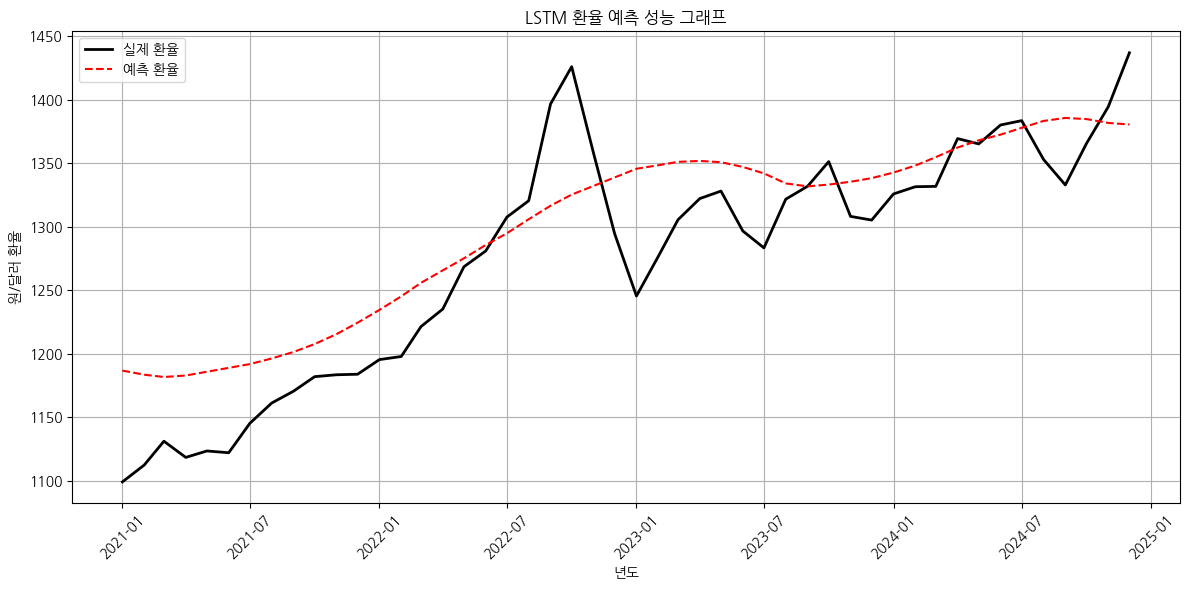

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

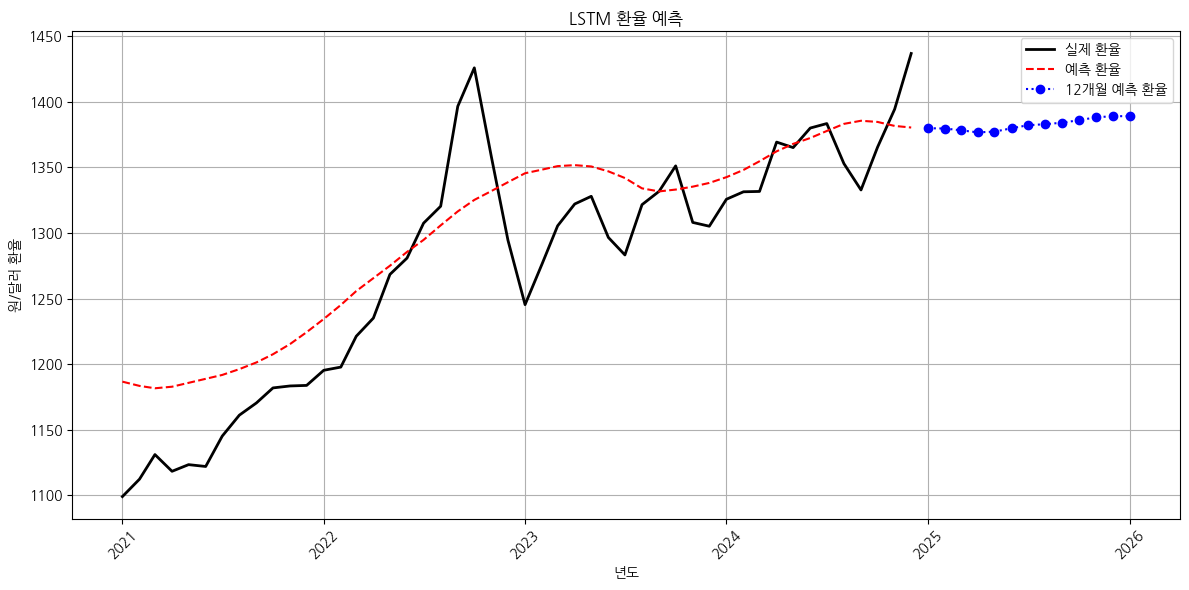

In [152]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
import copy

# === ÏãúÎìú Í≥†Ï†ï ===
def set_full_seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_full_seed(50)

# === Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ===
features = ['Í≤ΩÏ†ú Ïã¨Î¶¨ ÏßÄÏàò', 'ÌïúÍµ≠ Ïô∏Ìôò Î≥¥Ïú†Ïï°', 'vix', 'WTI Ïú†Í∞Ä', 'ÌïúÍµ≠ Ïã§ÏóÖÎ•†', 'ÎëêÎ∞îÏù¥ Ïú†Í∞Ä',
            'Brent Ïú†Í∞Ä', 'Ï≤úÏó∞Í∞ÄÏä§ Í∞ÄÍ≤©', 'Ïú†Ïó∞ÌÉÑ Í∞ÄÍ≤©', 'ÎØ∏Íµ≠ Ï£ºÍ∞ÄÏßÄÏàò',
            'ÌïúÍµ≠ Ïù∏ÌîåÎ†àÏù¥ÏÖòÏú®', 'Ïù∏ÌîåÎ†àÏù¥ÏÖò Í≤©Ï∞®', 'Ïã§ÏßàGDPÏÑ±Ïû•Î•†', 'M2',
            'Í∏à Í∞ÄÍ≤©', 'Íµ¨Î¶¨ Í∞ÄÍ≤©', 'ÏïÑÏó∞ Í∞ÄÍ≤©', 'ÏïåÎ£®ÎØ∏ÎäÑ Í∞ÄÍ≤©', 'ÎãàÏºà Í∞ÄÍ≤©',
            'Ïô∏Íµ≠Ïù∏ Ìà¨Ïûê Í∏àÏï°']
target = 'Ïõê/Îã¨Îü¨ÌôòÏú®'

X = df[features].ffill().bfill()
y = df[target].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled)

# === baseline Î™®Îç∏ ===
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=16, validation_data=(X_test_seq, y_test_seq),
          callbacks=[early_stop], verbose=0)

y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_seq)

baseline_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# === Permutation Importance ===
importance_results = {}
for col_idx in range(X_test_scaled.shape[1]):
    X_test_perm = copy.deepcopy(X_test_seq)
    for i in range(X_test_perm.shape[0]):
        np.random.shuffle(X_test_perm[:, :, col_idx])

    y_pred_perm_scaled = model.predict(X_test_perm)
    y_pred_perm = scaler_y.inverse_transform(y_pred_perm_scaled)
    perm_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_perm))
    importance = perm_rmse - baseline_rmse
    importance_results[col_idx] = importance

# ÏÉÅÏúÑ 10Í∞ú feature ÏÑ†ÌÉù
sorted_importance = sorted(importance_results.items(), key=lambda x: x[1], reverse=True)
top_10_indices = [idx for idx, _ in sorted_importance[:10]]
top_10_features = [features[idx] for idx in top_10_indices]

print("\n‚úÖ Top 10 Important Features:")
for feat in top_10_features:
    print(f"- {feat}")

# === Top 10 featureÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ ===
X_train_top = X_train_scaled[:, top_10_indices]
X_test_top = X_test_scaled[:, top_10_indices]

X_train_seq_top, y_train_seq_top = create_sequences(X_train_top, y_train_scaled)
X_test_seq_top, y_test_seq_top = create_sequences(X_test_top, y_test_scaled)

model_top = Sequential()
model_top.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_seq_top.shape[1], X_train_seq_top.shape[2])))
model_top.add(LSTM(32, activation='relu'))
model_top.add(Dense(1))
model_top.compile(optimizer='adam', loss='mse')

model_top.fit(X_train_seq_top, y_train_seq_top, epochs=200, batch_size=16,
              validation_data=(X_test_seq_top, y_test_seq_top),
              callbacks=[early_stop], verbose=0)

y_pred_top_scaled = model_top.predict(X_test_seq_top)
y_pred_top = scaler_y.inverse_transform(y_pred_top_scaled)
y_test_actual_top = scaler_y.inverse_transform(y_test_seq_top)

rmse = np.sqrt(mean_squared_error(y_test_actual_top, y_pred_top))
mae = mean_absolute_error(y_test_actual_top, y_pred_top)
r2 = r2_score(y_test_actual_top, y_pred_top)

print(f"\n‚úÖ Final Model Performance (Top 10 Features)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R¬≤: {r2:.4f}")

# === ÏÑ±Îä• Í∑∏ÎûòÌîÑ ===
test_dates_full = df.loc[X_test.index, 'TIME'].reset_index(drop=True)
test_dates = test_dates_full[12:]

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual_top, label='Ïã§Ï†ú ÌôòÏú®', color='black', linewidth=2)
plt.plot(test_dates, y_pred_top, label='ÏòàÏ∏° ÌôòÏú®', linestyle='--', color='red')
plt.title('LSTM ÌôòÏú® ÏòàÏ∏° ÏÑ±Îä• Í∑∏ÎûòÌîÑ')
plt.xlabel('ÎÖÑÎèÑ')
plt.ylabel('Ïõê/Îã¨Îü¨ ÌôòÏú®')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === ÎØ∏Îûò 3Í∞úÏõî ÏòàÏ∏° ===
last_input_seq = X_test_top[-12:].reshape(1, 12, X_test_top.shape[1])
future_preds_scaled = []

for _ in range(13):
    future_pred_scaled = model_top.predict(last_input_seq)
    future_preds_scaled.append(future_pred_scaled[0])
    last_input_seq = np.append(last_input_seq[:, 1:, :], last_input_seq[:, -1:, :], axis=1)

future_preds = scaler_y.inverse_transform(np.array(future_preds_scaled))

# ÎØ∏Îûò ÎÇ†Ïßú ÏÉùÏÑ±
last_date = pd.to_datetime(test_dates.iloc[-1])
future_dates = [last_date + MonthBegin(i) for i in range(1, 14)]
future_dates = pd.to_datetime(future_dates,format='%b-%y')

print("\n‚úÖ Future 3-Month Forecasted Exchange Rates:")
for i, (date, pred) in enumerate(zip(future_dates, future_preds.flatten()), 1):
    print(f"Month {i} ({date.strftime('%Y-%m')}): {pred:.4f} KRW/USD")

# === ÎØ∏Îûò ÏòàÏ∏° Í∑∏ÎûòÌîÑ ===
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual_top, label='Ïã§Ï†ú ÌôòÏú®', color='black', linewidth=2)
plt.plot(test_dates, y_pred_top, label='ÏòàÏ∏° ÌôòÏú®', linestyle='--', color='red')
plt.plot(future_dates, future_preds, label='12Í∞úÏõî ÏòàÏ∏° ÌôòÏú®', linestyle=':', color='blue', marker='o')
plt.title('LSTM ÌôòÏú® ÏòàÏ∏°')
plt.xlabel('ÎÖÑÎèÑ')
plt.ylabel('Ïõê/Îã¨Îü¨ ÌôòÏú®')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === ÎØ∏Îûò ÏòàÏ∏°Í∞í DataFrame ÏÉùÏÑ± ===
future_df = pd.DataFrame({
    'Month': [date.strftime('%Y-%m') for date in future_dates],
    'Predicted_Exchange_Rate': future_preds.flatten()
})

In [153]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df['TIME'] = pd.to_datetime(df['TIME'])

# ProphetÏóê ÎßûÎäî Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÍ≤Ω: 'ds' = ÎÇ†Ïßú, 'y' = ÏòàÏ∏° ÎåÄÏÉÅ
df_prophet = df[['TIME', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©']].rename(columns={
    'TIME': 'ds',
    'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©': 'y'
})

# üîΩ 2000ÎÖÑ Ïù¥ÌõÑÎ°ú ÌïÑÌÑ∞ÎßÅ
df_prophet = df_prophet[df_prophet['ds'] >= '2000-01-01']

# Í≤∞Ï∏°Ïπò Î≥¥Í∞Ñ (Ï§ëÏöî!)
df_prophet['y'] = df_prophet['y'].fillna(method='ffill').fillna(method='bfill')


<ipython-input-153-f5815ec3030d>:16: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [154]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0bo_9e6/oc9xxyq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0bo_9e6/8geo65if.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38765', 'data', 'file=/tmp/tmpc0bo_9e6/oc9xxyq4.json', 'init=/tmp/tmpc0bo_9e6/8geo65if.json', 'output', 'file=/tmp/tmpc0bo_9e6/prophet_modelb59h02tb/prophet_model-20250512082014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:20:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:20:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


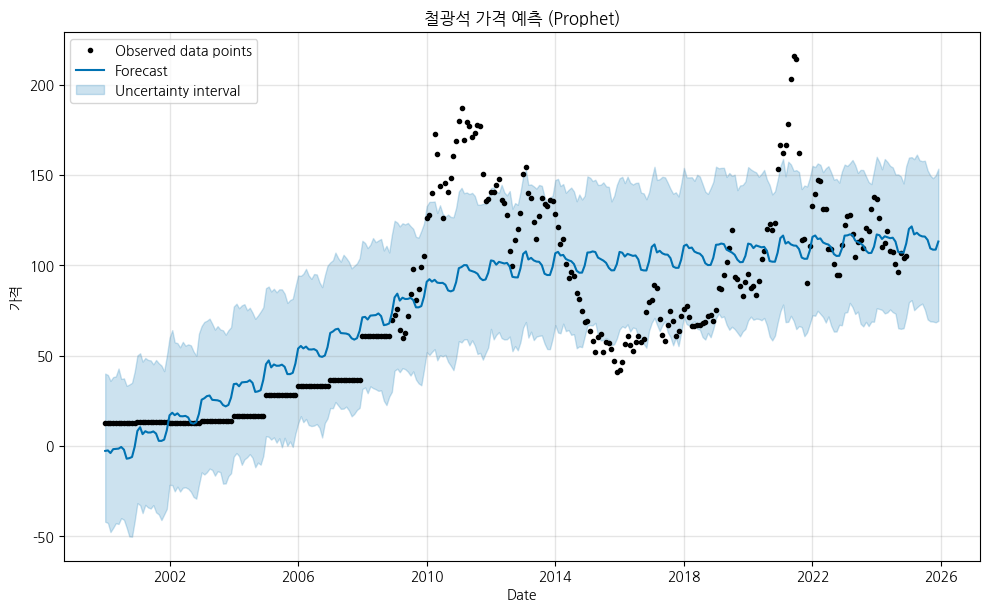

In [155]:
#12Í∞úÏõî Ïù¥ÌõÑÍπåÏßÄ ÏòàÏ∏°
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

model.plot(forecast)
plt.title('Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© ÏòàÏ∏° (Prophet)')
plt.xlabel('Date')
plt.ylabel('Í∞ÄÍ≤©')
plt.grid(True)
plt.legend()
plt.show()


- Í≤ÄÏ†ï Ï†ê: Ïã§Ï†ú
- ÌååÎûÄ ÏÑ†: ÏòàÏ∏°
- ÌååÎûÄ ÏòÅÏó≠: Ïã†Î¢∞Íµ¨Í∞Ñ(95%)

In [156]:
# 1. forecast + Ïã§Ï†úÍ∞í df_prophet merge
forecast_eval = pd.merge(
    forecast[['ds', 'yhat']],
    df_prophet[['ds', 'y']],
    on='ds',
    how='left'
)

# 2. Ïã§Ï†úÍ∞í ÏûàÎäî Íµ¨Í∞ÑÎßå ÎÇ®Í∏∞Í∏∞
#eval_df = forecast_eval.dropna(subset=['y'])
eval_df = forecast_eval

# 3. ÏµúÍ∑º 12Í∞úÏõî Í∏∞Ï§ÄÏúºÎ°ú tail
recent_12_months = eval_df.tail(24)
recent_12_months.reset_index(drop=True, inplace=True)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print(recent_12_months)


           ds        yhat       y
0  2024-01-01  117.056777  136.59
1  2024-02-01  116.635842  125.93
2  2024-03-01  114.553545  110.19
3  2024-04-01  116.040221  112.23
4  2024-05-01  115.504677  119.24
5  2024-06-01  114.996160  108.10
6  2024-07-01  115.255107  107.39
7  2024-08-01  113.107674  100.91
8  2024-09-01  107.412898   96.24
9  2024-10-01  107.058567  106.61
10 2024-11-01  107.031764  103.98
11 2024-12-01  112.027935  105.34
12 2025-01-01  120.104942     NaN
13 2025-02-01  121.504489     NaN
14 2025-03-01  117.059366     NaN
15 2025-04-01  117.985364     NaN
16 2025-05-01  116.616908     NaN
17 2025-06-01  115.986513     NaN
18 2025-07-01  115.889614     NaN
19 2025-08-01  114.030407     NaN
20 2025-09-01  109.324734     NaN
21 2025-10-01  108.647633     NaN
22 2025-11-01  108.677030     NaN
23 2025-12-01  113.145135     NaN


In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞í merge
forecast_eval = pd.merge(
    forecast[['ds', 'yhat']],
    df_prophet[['ds', 'y']],
    on='ds',
    how='left'
)

# 2. 2000ÎÖÑ Ïù¥ÌõÑÎ°ú ÌïÑÌÑ∞ÎßÅ
forecast_eval = forecast_eval[forecast_eval['ds'] >= '2000-01-01']

# 3. Ïã§Ï†úÍ∞í ÏûàÎäî Íµ¨Í∞ÑÎßå ÎπÑÍµê
eval_df = forecast_eval.dropna(subset=['y'])

# 4. ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
y_true = eval_df['y']
y_pred = eval_df['yhat']

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"üìä Prophet Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© ÏòàÏ∏° ÏÑ±Îä•:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤  : {r2:.4f}")


üìä Prophet Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© ÏòàÏ∏° ÏÑ±Îä•:
MAE : 24.87
RMSE: 32.12
R¬≤  : 0.5955


In [158]:
# 1. Ïã§Ï∏° Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 1ÎÖÑ)
df_real = df[['TIME', 'Ïõê/Îã¨Îü¨ÌôòÏú®', 'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©']]
df_real = df_real[(df_real['TIME'] >= '2024-01-01') & (df_real['TIME'] <= '2024-12-31')]
df_real = df_real.rename(columns={
    'TIME': 'ds',
    'Ïõê/Îã¨Îü¨ÌôòÏú®': 'ÌôòÏú®',
    'Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©': 'Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©'
})

# 2. ÏòàÏ∏° ÌôòÏú® (Ïòà: LSTM Í∏∞Î∞ò)
df_fx_pred = pd.DataFrame({
    'ds': future_dates,                  # ÏõîÏ¥à ÎÇ†Ïßú (2025-01 ~ 2025-03)
    'ÌôòÏú®': future_preds.flatten()       # LSTM ÏòàÏ∏° ÌôòÏú®
})

# 3. ÏòàÏ∏° Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© (Prophet Í∏∞Î∞ò)
df_iron_pred = forecast[['ds', 'yhat']].iloc[-12:].reset_index(drop=True)
df_iron_pred = df_iron_pred.rename(columns={'yhat': 'Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©'})

# 4. ÏòàÏ∏° ÌôòÏú® + Ï≤†Í¥ëÏÑù Í∞ÄÍ≤© merge
df_pred = pd.merge(df_fx_pred, df_iron_pred, on='ds', how='inner')

# 5. Ïã§Ï∏° + ÏòàÏ∏° concat
df_combined = pd.concat([df_real, df_pred], ignore_index=True)

# ‚úÖ Í≤∞Í≥º ÌôïÏù∏
print(df_combined)


           ds           ÌôòÏú®       Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©
0  2024-01-01  1325.670000  136.590000
1  2024-02-01  1331.370000  125.930000
2  2024-03-01  1331.630000  110.190000
3  2024-04-01  1369.250000  112.230000
4  2024-05-01  1365.050000  119.240000
5  2024-06-01  1379.950000  108.100000
6  2024-07-01  1383.370000  107.390000
7  2024-08-01  1352.870000  100.910000
8  2024-09-01  1332.760000   96.240000
9  2024-10-01  1365.370000  106.610000
10 2024-11-01  1394.320000  103.980000
11 2024-12-01  1436.780000  105.340000
12 2025-01-01  1379.819580  120.104942
13 2025-02-01  1379.575317  121.504489
14 2025-03-01  1378.214355  117.059366
15 2025-04-01  1376.670166  117.985364
16 2025-05-01  1377.221069  116.616908
17 2025-06-01  1379.768555  115.986513
18 2025-07-01  1382.137817  115.889614
19 2025-08-01  1382.867920  114.030407
20 2025-09-01  1384.064331  109.324734
21 2025-10-01  1385.912354  108.647633
22 2025-11-01  1388.101562  108.677030
23 2025-12-01  1389.001465  113.145135


In [159]:
df_combined['ÏàòÏûÖÎã®Í∞Ä'] = df_combined['ÌôòÏú®'] * df_combined['Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©']
df_combined['Îã®Í∞Ä_Î≥ÄÌôîÏú®(%)'] = df_combined['ÏàòÏûÖÎã®Í∞Ä'].pct_change() * 100
df_combined

ds           ÌôòÏú®       Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©           ÏàòÏûÖÎã®Í∞Ä  Îã®Í∞Ä_Î≥ÄÌôîÏú®(%)
0  2024-01-01  1325.670000  136.590000  181073.265300        NaN
1  2024-02-01  1331.370000  125.930000  167659.424100  -7.407963
2  2024-03-01  1331.630000  110.190000  146732.309700 -12.481920
3  2024-04-01  1369.250000  112.230000  153670.927500   4.728759
4  2024-05-01  1365.050000  119.240000  162768.562000   5.920205
5  2024-06-01  1379.950000  108.100000  149172.595000  -8.352944
6  2024-07-01  1383.370000  107.390000  148560.104300  -0.410592
7  2024-08-01  1352.870000  100.910000  136518.111700  -8.105805
8  2024-09-01  1332.760000   96.240000  128264.822400  -6.045564
9  2024-10-01  1365.370000  106.610000  145562.095700  13.485594
10 2024-11-01  1394.320000  103.980000  144981.393600  -0.398938
11 2024-12-01  1436.780000  105.340000  151350.405200   4.392986
12 2025-01-01  1379.819580  120.104942  165723.151094   9.496338
13 2025-02-01  1379.575317  121.504489  167624.593479   1.147361
14 2025-03-01  1378.214355  117.059366  161332.898484  -3.753444
15 2025-04-01  1376.670166  117.985364  162426.931131   0.678121
16 2025-05-01  1377.221069  116.616908  160607.262671  -1.120300
17 2025-06-01  1379.768555  115.986513  160034.542892  -0.356596
18 2025-07-01  1382.137817  115.889614  160175.417598   0.088028
19 2025-08-01  1382.867920  114.030407  157688.992094  -1.552314
20 2025-09-01  1384.064331  109.324734  151312.465048  -4.043736
21 2025-10-01  1385.912354  108.647633  150576.096260  -0.486654
22 2025-11-01  1388.101562  108.677030  150854.754533   0.185061
23 2025-12-01  1389.001465  113.145135  157158.758005   4.178856

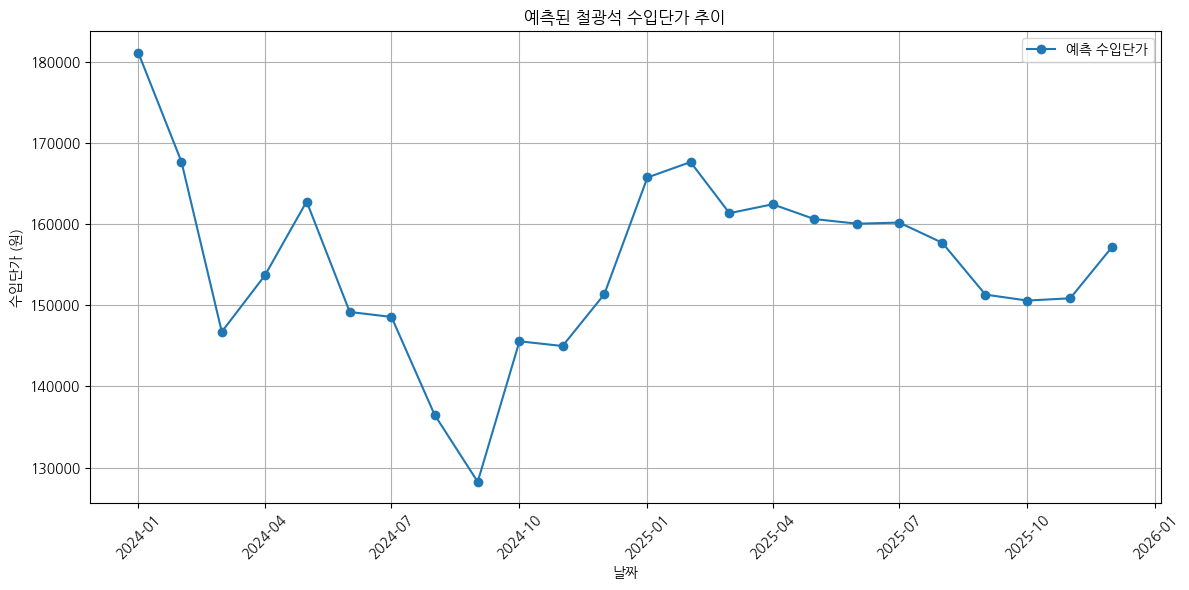

ds           ÌôòÏú®       Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©           ÏàòÏûÖÎã®Í∞Ä  Îã®Í∞Ä_Î≥ÄÌôîÏú®(%)
0  2024-01-01  1325.670000  136.590000  181073.265300        NaN
1  2024-02-01  1331.370000  125.930000  167659.424100  -7.407963
2  2024-03-01  1331.630000  110.190000  146732.309700 -12.481920
3  2024-04-01  1369.250000  112.230000  153670.927500   4.728759
4  2024-05-01  1365.050000  119.240000  162768.562000   5.920205
5  2024-06-01  1379.950000  108.100000  149172.595000  -8.352944
6  2024-07-01  1383.370000  107.390000  148560.104300  -0.410592
7  2024-08-01  1352.870000  100.910000  136518.111700  -8.105805
8  2024-09-01  1332.760000   96.240000  128264.822400  -6.045564
9  2024-10-01  1365.370000  106.610000  145562.095700  13.485594
10 2024-11-01  1394.320000  103.980000  144981.393600  -0.398938
11 2024-12-01  1436.780000  105.340000  151350.405200   4.392986
12 2025-01-01  1379.819580  120.104942  165723.151094   9.496338
13 2025-02-01  1379.575317  121.504489  167624.593479   1.147361
14 2025-03-01  1378.214355  117.059366  161332.898484  -3.753444
15 2025-04-01  1376.670166  117.985364  162426.931131   0.678121
16 2025-05-01  1377.221069  116.616908  160607.262671  -1.120300
17 2025-06-01  1379.768555  115.986513  160034.542892  -0.356596
18 2025-07-01  1382.137817  115.889614  160175.417598   0.088028
19 2025-08-01  1382.867920  114.030407  157688.992094  -1.552314
20 2025-09-01  1384.064331  109.324734  151312.465048  -4.043736
21 2025-10-01  1385.912354  108.647633  150576.096260  -0.486654
22 2025-11-01  1388.101562  108.677030  150854.754533   0.185061
23 2025-12-01  1389.001465  113.145135  157158.758005   4.178856

In [160]:
import matplotlib.pyplot as plt

# ÏàòÏûÖÎã®Í∞Ä ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12,6))
plt.plot(df_combined['ds'], df_combined['ÏàòÏûÖÎã®Í∞Ä'], marker='o', label='ÏòàÏ∏° ÏàòÏûÖÎã®Í∞Ä')
plt.title('ÏòàÏ∏°Îêú Ï≤†Í¥ëÏÑù ÏàòÏûÖÎã®Í∞Ä Ï∂îÏù¥')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÏàòÏûÖÎã®Í∞Ä (Ïõê)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÌÖåÏù¥Î∏î ÌôïÏù∏
df_combined

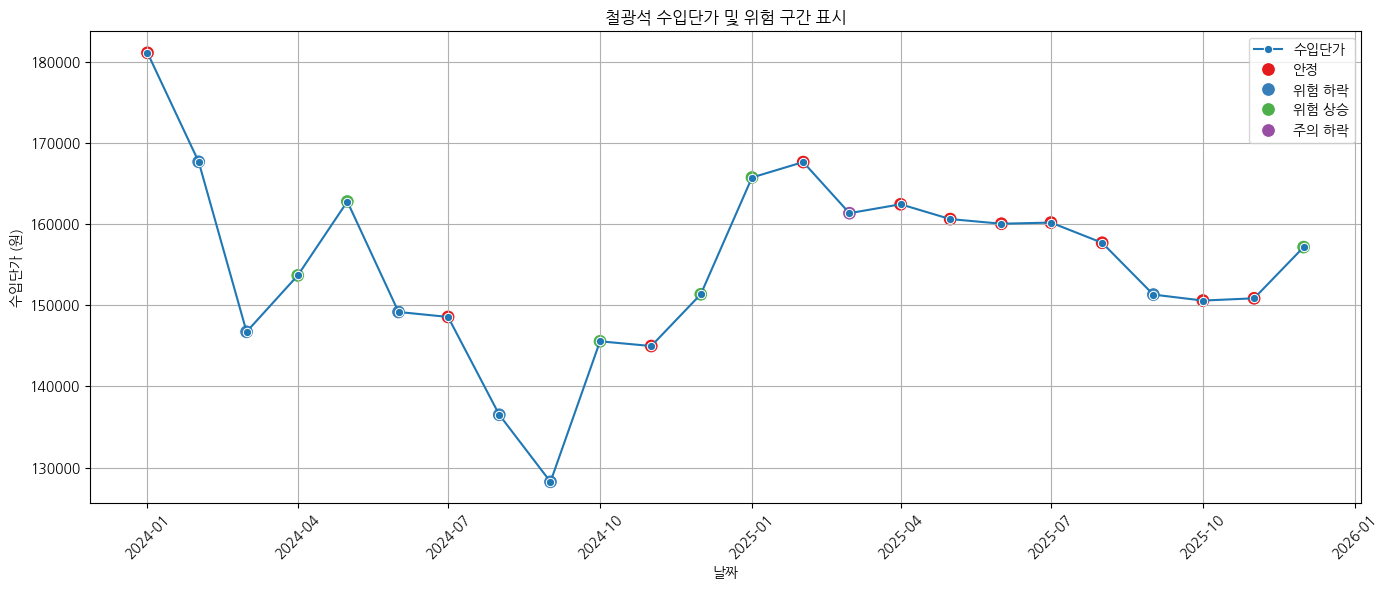

In [161]:
def classify_risk(change):
    if change >= 4:
        return 'ÏúÑÌóò ÏÉÅÏäπ'
    elif change >= 2:
        return 'Ï£ºÏùò ÏÉÅÏäπ'
    elif change <= -4:
        return 'ÏúÑÌóò ÌïòÎùΩ'
    elif change <= -2:
        return 'Ï£ºÏùò ÌïòÎùΩ'
    else:
        return 'ÏïàÏ†ï'

# Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
df_combined['ÏàòÏûÖÎã®Í∞Ä_Î≥ÄÌôîÏú®(%)'] = df_combined['ÏàòÏûÖÎã®Í∞Ä'].pct_change() * 100

# ÏúÑÌóò Íµ¨Í∞Ñ Î∂ÑÎ•ò
df_combined['ÏúÑÌóòÍµ¨Í∞Ñ'] = df_combined['ÏàòÏûÖÎã®Í∞Ä_Î≥ÄÌôîÏú®(%)'].apply(classify_risk)

# Í≤∞Í≥º ÌôïÏù∏
df_combined[['ds', 'ÏàòÏûÖÎã®Í∞Ä', 'ÏàòÏûÖÎã®Í∞Ä_Î≥ÄÌôîÏú®(%)', 'ÏúÑÌóòÍµ¨Í∞Ñ']].tail(12)

import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=df_combined, x='ds', y='ÏàòÏûÖÎã®Í∞Ä', marker='o', label='ÏàòÏûÖÎã®Í∞Ä')
sns.scatterplot(data=df_combined, x='ds', y='ÏàòÏûÖÎã®Í∞Ä', hue='ÏúÑÌóòÍµ¨Í∞Ñ', palette='Set1', s=100)
plt.title('Ï≤†Í¥ëÏÑù ÏàòÏûÖÎã®Í∞Ä Î∞è ÏúÑÌóò Íµ¨Í∞Ñ ÌëúÏãú')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÏàòÏûÖÎã®Í∞Ä (Ïõê)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Ï£ºÏùò, ÏúÑÌóò Íµ¨Í∞ÑÏùÑ 2ÏôÄ 4Î°ú ÏÑ†Ï†ïÌïú Ïù¥Ïú†:
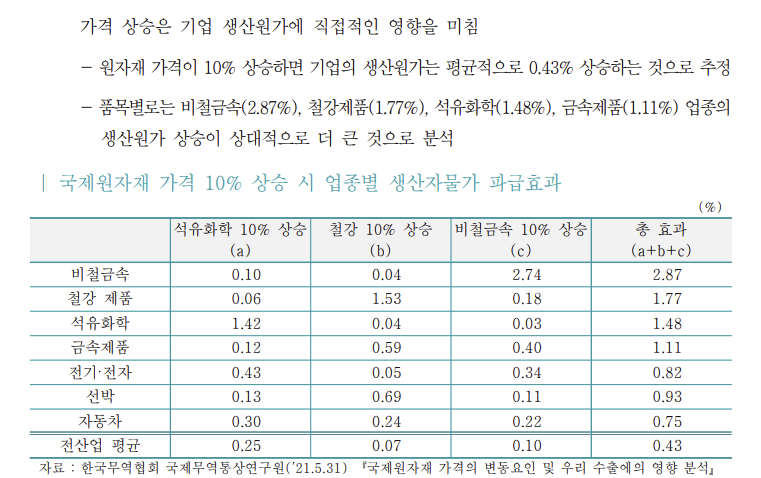


Ïù¥ Í∏∞Ï§ÄÏùÄ ÏÇ∞ÏóÖÎ≥Ñ Î¨ºÍ∞Ä ÌååÍ∏âÌö®Í≥ºÎ•º Îã§Î£¨ ÎÖºÎ¨∏ ÏûêÎ£åÏóêÏÑú,
ÏõêÏûêÏû¨ Í∞ÄÍ≤© 10% ÏÉÅÏäπ Ïãú ÏÉùÏÇ∞ÏûêÎ¨ºÍ∞ÄÍ∞Ä ÌèâÍ∑† 0.43%, ÏùºÎ∂Ä ÏóÖÏ¢ÖÏùÄ 2~3% Ïù¥ÏÉÅ ÏÉÅÏäπÌïòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇú Ï†êÏùÑ Ï∞∏Í≥†ÌïòÏòÄÎã§.
Ïù¥Îäî Ïã§Ï†ú Í∏∞ÏóÖÏùò ÏÉùÏÇ∞ÎπÑ, Í≥ÑÏïΩ Ï†ÑÎûµ, Íµ¨Îß§ ÌÉÄÏù¥Î∞çÏóê ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï£ºÎäî Íµ¨Í∞ÑÏúºÎ°ú,
ÏòàÏ∏° ÏãúÏä§ÌÖúÏùÑ ÌÜµÌïú Ï°∞Í∏∞ Í≤ΩÍ≥† Î∞è ÎåÄÏùë Ï†ÑÎûµ ÏàòÎ¶ΩÏóê Ïú†Ìö®ÌïòÎã§Í≥† ÌåêÎã®ÎêúÎã§.

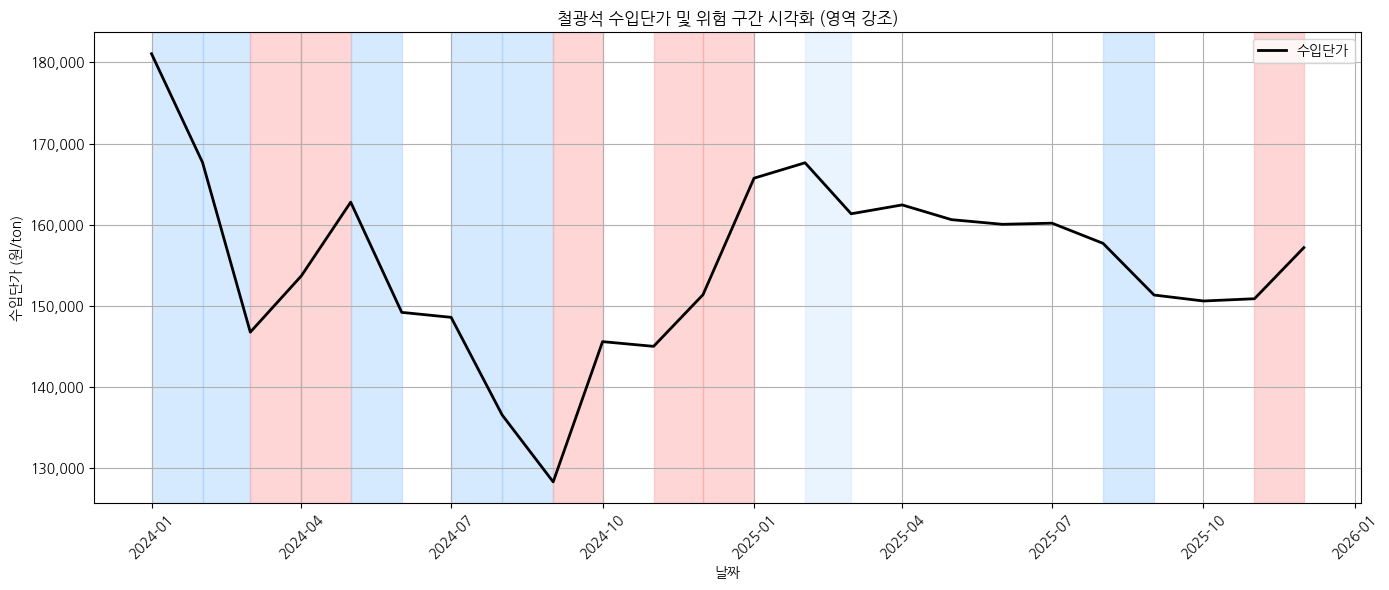

In [162]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(14,6))

# ÏàòÏûÖÎã®Í∞Ä Ï∂îÏù¥ÏÑ†
plt.plot(df_combined['ds'], df_combined['ÏàòÏûÖÎã®Í∞Ä'], label='ÏàòÏûÖÎã®Í∞Ä', color='black', linewidth=2)

# risk Î≤îÏúÑ ÏÑ§Ï†ï
def classify_risk(change):
    if change >= 4:
        return 'ÏúÑÌóò ÏÉÅÏäπ'
    elif change >= 2:
        return 'Ï£ºÏùò ÏÉÅÏäπ'
    elif change <= -4:
        return 'ÏúÑÌóò ÌïòÎùΩ'
    elif change <= -2:
        return 'Ï£ºÏùò ÌïòÎùΩ'
    else:
        return 'ÏïàÏ†ï'

# ÏÉâÍπî ÏòÅÏó≠ ÏßÄÏ†ï
for i in range(1, len(df_combined)):
    x_start = df_combined['ds'].iloc[i-1]
    x_end = df_combined['ds'].iloc[i]
    risk = df_combined['ÏúÑÌóòÍµ¨Í∞Ñ'].iloc[i]

    if risk == 'ÏúÑÌóò ÏÉÅÏäπ':
        color = '#ff9999'  # Îπ®Í∞ï
    elif risk == 'Ï£ºÏùò ÏÉÅÏäπ':
        color = '#ffe6cc'  # Ï£ºÌô©
    elif risk == 'Ï£ºÏùò ÌïòÎùΩ':
        color = '#cce5ff'  # ÌååÎûë
    elif risk == 'ÏúÑÌóò ÌïòÎùΩ':
        color = '#99ccff'  # ÏßÑÌïú ÌååÎûë
    else:
        continue

    plt.axvspan(x_start, x_end, color=color, alpha=0.4)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Î†àÏù¥Î∏î Î∞è Í∏∞ÌÉÄ
plt.title('Ï≤†Í¥ëÏÑù ÏàòÏûÖÎã®Í∞Ä Î∞è ÏúÑÌóò Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôî (ÏòÅÏó≠ Í∞ïÏ°∞)')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÏàòÏûÖÎã®Í∞Ä (Ïõê/ton)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['ÏàòÏûÖÎã®Í∞Ä'])
plt.tight_layout()
plt.show()

In [163]:
import plotly.graph_objects as go
import pandas as pd

# ÏòàÏ∏° Í∏∞Ï§ÄÏùº
ÏòàÏ∏°ÏãúÏûëÏùº = pd.to_datetime("2025-01-01")
df_combined['ÏòàÏ∏°Ïó¨Î∂Ä'] = df_combined['ds'] >= ÏòàÏ∏°ÏãúÏûëÏùº

# Plot ÏÉùÏÑ±
fig = go.Figure()

# ‚ñ∂ ÏàòÏûÖÎã®Í∞Ä ÏÑ†
fig.add_trace(go.Scatter(
    x=df_combined['ds'],
    y=df_combined['ÏàòÏûÖÎã®Í∞Ä'],
    mode='lines',
    line=dict(color='black'),
    name='',
    hoverinfo='skip'
))

# ‚ñ∂ ÏÉâÏπ† ÏòÅÏó≠: ÌòÑÏû¨ ÏãúÏ†êÎ∂ÄÌÑ∞ Îã§Ïùå ÏãúÏ†êÍπåÏßÄ (Í≤ΩÍ≥† ÏãúÏûëÏ†êÏúºÎ°ú ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥¥Ïù¥ÎèÑÎ°ù ÏàòÏ†ï)
for i in range(len(df_combined)):
    x_start = df_combined['ds'].iloc[i-1]
    x_end = df_combined['ds'].iloc[i]
    risk = df_combined['ÏúÑÌóòÍµ¨Í∞Ñ'].iloc[i]

    if risk == 'ÏúÑÌóò ÏÉÅÏäπ':
        color = '#ffcccc'  # Ïó∞Î∂ÑÌôç
    elif risk == 'Ï£ºÏùò ÏÉÅÏäπ':
        color = '#ffe5cc'  # Ïó∞ÏÇ¥Íµ¨
    elif risk == 'Ï£ºÏùò ÌïòÎùΩ':
        color = '#e0ecff'  # Ïó∞ÌïòÎäò
    elif risk == 'ÏúÑÌóò ÌïòÎùΩ':
        color = '#c7dcff'  # Ï§ëÌïòÎäò
    else:
        continue

    fig.add_vrect(
        x0=x_start, x1=x_end,
        fillcolor=color,
        opacity=0.3,
        line_width=0
    )

# ‚ñ∂ Hover ÌÖçÏä§Ìä∏
hover_text = []
for i, row in df_combined.iterrows():
    risk = row['ÏúÑÌóòÍµ¨Í∞Ñ']
    if 'ÏúÑÌóò' in risk:
        risk_display = f"<b><span style='color:red'>{risk}</span></b>"
    elif 'Ï£ºÏùò' in risk:
        risk_display = f"<b><span style='color:orange'>{risk}</span></b>"
    else:
        risk_display = f"<span style='color:blue'>ÏïàÏ†ï</span>"

    if row['ÏòàÏ∏°Ïó¨Î∂Ä']:
        hover_text.append(
            f"<b>{row['ds'].strftime('%Y-%m')}</b><br>"
            f"{risk_display}<br>"
            f"ÏòàÏ∏° ÌôòÏú®: {row['ÌôòÏú®']:,.2f} Ïõê<br>"
            f"ÏòàÏ∏° Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©: {row['Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©']:,.2f} USD<br>"
            f"ÏòàÏ∏° ÏàòÏûÖÎã®Í∞Ä: {row['ÏàòÏûÖÎã®Í∞Ä']:,.2f} Ïõê<br>"
            f"ÏòàÏ∏° Î≥ÄÌôîÏú®: {row['ÏàòÏûÖÎã®Í∞Ä_Î≥ÄÌôîÏú®(%)']:.2f}% (Ï†ÑÏõî ÎåÄÎπÑ)"
        )
    else:
        hover_text.append(
            f"<b>{row['ds'].strftime('%Y-%m')}</b><br>"
            f"{risk_display}<br>"
            f"ÌôòÏú®: {row['ÌôòÏú®']:,.2f} Ïõê<br>"
            f"Ï≤†Í¥ëÏÑù Í∞ÄÍ≤©: {row['Ï≤†Í¥ëÏÑùÍ∞ÄÍ≤©']:,.2f} USD<br>"
            f"ÏàòÏûÖÎã®Í∞Ä: {row['ÏàòÏûÖÎã®Í∞Ä']:,.2f} Ïõê<br>"
            f"Î≥ÄÌôîÏú®: {row['ÏàòÏûÖÎã®Í∞Ä_Î≥ÄÌôîÏú®(%)']:.2f}% (Ï†ÑÏõî ÎåÄÎπÑ)"
        )

# ‚ñ∂ Hover Ï†ê ÌëúÏãú
fig.add_trace(go.Scatter(
    x=df_combined['ds'],
    y=df_combined['ÏàòÏûÖÎã®Í∞Ä'],
    mode='markers',
    marker=dict(color='black', size=6),
    text=hover_text,
    hoverinfo='text',
    name='',
    showlegend=False
))

# ‚ñ∂ Í∏∞Ï§ÄÏÑ†: ÏòàÏ∏° ÏãúÏûë
fig.add_vline(x=ÏòàÏ∏°ÏãúÏûëÏùº, line_dash='dot', line_color='black')

# ‚ñ∂ Ï∂ï ÏÑ§Ï†ï
fig.update_yaxes(title='ÏàòÏûÖÎã®Í∞Ä (Ïõê)', tickformat=",", showgrid=True)
fig.update_xaxes(title='ÎÇ†Ïßú', showgrid=True)

# ‚ñ∂ Ï†ÑÏ≤¥ Î†àÏù¥ÏïÑÏõÉ
fig.update_layout(
    title='Ï≤†Í¥ëÏÑù ÏàòÏûÖÎã®Í∞Ä Î∞è Î≥ÄÌôîÏú® Í∏∞Î∞ò ÏúÑÌóò Íµ¨Í∞Ñ (ÏµúÏ¢Ö Plotly)',
    hovermode='x unified',
    template='simple_white',
    height=500
)

fig.show()


2024ÎÖÑ 11ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 1ÏõîÍπåÏßÄÏùò Íµ¨Í∞ÑÏóêÏÑúÎäî Ï≤†Í¥ëÏÑù ÏàòÏûÖÎã®Í∞ÄÍ∞Ä ÏïΩ 10% Í∞ÄÍπåÏù¥ Í∏âÎì±ÌïòÎäî Í≤ÉÏúºÎ°ú ÏòàÏ∏°Îê©ÎãàÎã§.

Ïù¥Ïóê Îî∞Îùº Î≥∏ Î∂ÑÏÑùÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï†ÑÎûµÏ†Å ÏãúÏÇ¨Ï†êÏùÑ Ï†úÏïàÌï©ÎãàÎã§:

- Îã®Í∏∞Ï†ÅÏúºÎ°úÎäî ÏÑ†Î¨ºÍ≥ÑÏïΩ ÎòêÎäî Ï°∞Í∏∞ Íµ¨Îß§Î•º ÌÜµÌï¥ Í≥†Ï†ê ÌöåÌîº Ï†ÑÎûµÏùÑ Í≥†Î†§



---

